# Ex 6.3 Geospatial Visualisations in Python

### 1-3. Import libraries and install folium

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import folium

In [2]:
# Make matplotlib visualisations appear in the notebook

%matplotlib inline

In [4]:
# Define path

path = r'/Users/andymiller/Desktop/CareerFoundry Data Analytics/6. Advanced Analytics and Dashboard Design'

In [5]:
# Import data from csv file

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'coral_cleaned.csv'), index_col = False)

In [6]:
# Re-add the live_coral_categories from Ex 6.2 since data was not exported

df.loc[df['mean_live_coral'] < 17, 'live_coral_category'] = 'Low coral abundance'

In [7]:
df.loc[(df['mean_live_coral'] >= 17) & (df['mean_live_coral'] < 30), 'live_coral_category'] = 'Medium coral abundance'

In [8]:
df.loc[df['mean_live_coral'] >= 30, 'live_coral_category'] = 'High coral abundance'

In [9]:
df['live_coral_category'].value_counts()

live_coral_category
Low coral abundance       962
Medium coral abundance    956
High coral abundance      728
Name: count, dtype: int64

### Make list of reef names

In [10]:
df.head()

Unnamed: 0 sector shelf         reef_name reef_id   latitude   longitude  \
0           0     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   
1           1     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   
2           2     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   
3           3     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   
4           4     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   

  p_code  visit_no  year_code  ...  mean_dead_coral total_cots  \
0     RM         1     199293  ...            2.576          0   
1     RM         4     199596  ...            1.810          0   
2     RM         5     199697  ...            1.983          0   
3     RM         6     199798  ...            2.177          3   
4     RM         7     199899  ...            2.672          6   

  mean_cots_per_tow total_trout mean_trout_per_tow  tows  \
0             0.000         NaN                NaN    33   
1             0.000         NaN                NaN    29   
2             0.000         NaN                NaN    29   
3             0.097         NaN                NaN    31   
4             0.207         NaN                NaN    29   

   median_soft_coral_midpoint  median_live_coral_midpoint  \
0                         NaN                         NaN   
1                         NaN                        35.0   
2                         NaN                        25.0   
3                        15.0                        35.0   
4                        15.0                        15.0   

   median_dead_coral_midpoint     live_coral_category  
0                         NaN  Medium coral abundance  
1                         2.5  Medium coral abundance  
2                         2.5    High coral abundance  
3                         2.5    High coral abundance  
4                         2.5  Medium coral abundance  

[5 rows x 27 columns]

In [13]:
df['reef_name'].unique()

array(['LOW ISLANDS REEF', 'GREEN ISLAND REEF', 'FITZROY ISLAND REEF',
       'PICKERSGILL REEF', 'EVENING REEF', 'MORNING REEF', '16013A',
       '16013B', '16013C', 'MACKAY REEF', '16017S', 'UNDINE REEF (WEST)',
       'RUDDER REEF', 'CHINAMAN REEF(16024)', 'TONGUE (2)', 'SAXON REEF',
       'PIXIE REEF', 'OYSTER REEF', 'VLASOFF REEF', 'UPOLU REEF',
       'HASTINGS REEF', 'MICHAELMAS REEF', 'ARLINGTON REEF',
       'THETFORD REEF', 'RUBY REEF', 'ANDERSEN REEF',
       'RACHEL CARSON REEF', 'ESCAPE (1)', 'AGINCOURT REEFS (NO 4)',
       'AGINCOURT REEFS (NO 3)', 'AGINCOURT REEFS (NO 1)',
       'ST CRISPIN REEF', 'OPAL (2)', 'NORMAN REEF', 'HOPE REEF(16058)',
       'EUSTON REEF', 'FLYNN REEF', 'NORTH REEF (NORTH)',
       'BROOMFIELD REEF', 'WRECK ISLAND REEF', 'ONE TREE REEF',
       'ERSKINE REEF', 'MAST HEAD REEF', 'FITZROY REEF', 'BOULT REEF',
       'HOSKYN ISLANDS REEF', 'FAIRFAX ISLANDS REEF',
       'LADY MUSGRAVE REEF', 'BIRD ISLANDS REEF (NORTH)', 'KAY REEF',
       'CURD 

In [14]:
df.head()


Unnamed: 0 sector shelf         reef_name reef_id   latitude   longitude  \
0           0     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   
1           1     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   
2           2     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   
3           3     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   
4           4     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   

  p_code  visit_no  year_code  ...  mean_dead_coral total_cots  \
0     RM         1     199293  ...            2.576          0   
1     RM         4     199596  ...            1.810          0   
2     RM         5     199697  ...            1.983          0   
3     RM         6     199798  ...            2.177          3   
4     RM         7     199899  ...            2.672          6   

  mean_cots_per_tow total_trout mean_trout_per_tow  tows  \
0             0.000         NaN                NaN    33   
1             0.000         NaN                NaN    29   
2             0.000         NaN                NaN    29   
3             0.097         NaN                NaN    31   
4             0.207         NaN                NaN    29   

   median_soft_coral_midpoint  median_live_coral_midpoint  \
0                         NaN                         NaN   
1                         NaN                        35.0   
2                         NaN                        25.0   
3                        15.0                        35.0   
4                        15.0                        15.0   

   median_dead_coral_midpoint     live_coral_category  
0                         NaN  Medium coral abundance  
1                         2.5  Medium coral abundance  
2                         2.5    High coral abundance  
3                         2.5    High coral abundance  
4                         2.5  Medium coral abundance  

[5 rows x 27 columns]

In [16]:
import geopandas as gpd

In [17]:
# After a day and a half, geopandas is finally installed... 

The shapefile for the reefs in the GBR was found [here](https://catalogue.eatlas.org.au/geonetwork/srv/eng/catalog.search#/metadata/d2396b2c-68d4-4f4b-aab0-52f7bc4a81f5)

In [24]:
# Import data from shapefile

gdf = gpd.read_file(os.path.join(path, '02 Data', 'Original Data', 'GBR_reefs.shp'))

In [25]:
gdf

TARGET_FID      DATASET                LOC_NAME_S        GBR_NAME  \
0              1  TS Features   U/N Sand Bank (09-347a)   U/N Sand Bank   
1              2  TS Features    U/N Sand Bank (09-347)   U/N Sand Bank   
2              3  TS Features   U/N Sand Bank (09-355z)   U/N Sand Bank   
3              4  TS Features  U/N Sand Bank (09-355a0)   U/N Sand Bank   
4              5  TS Features  U/N Sand Bank (09-355a1)   U/N Sand Bank   
...          ...          ...                       ...             ...   
9607        9608  TS Features    Alert Patches (10-230)   Alert Patches   
9608        9609  TS Features   Herald Patches (10-231)  Herald Patches   
9609        9610  TS Features      Quetta Rock (10-258)     Quetta Rock   
9610         317  TS Features  U/N Rocky Reef (10-064e)  U/N Rocky Reef   
9611         317  TS Features      West Rocks (10-064d)      West Rocks   

          CHART_NAME TRAD_NAME UN_FEATURE  LABEL_ID  SORT_GBR_I FEAT_NAME  \
0               None      None       TRUE   09-347a        9347      Bank   
1               None      None       TRUE    09-347        9347      Bank   
2               None      None       TRUE   09-355z        9355      Bank   
3               None      None       TRUE  09-355a0        9355      Bank   
4               None      None       TRUE  09-355a1        9355      Bank   
...              ...       ...        ...       ...         ...       ...   
9607   Alert Patches      None      FALSE    10-230       10230      Bank   
9608  Herald Patches      None      FALSE    10-231       10231      Bank   
9609     Quetta Rock      None      FALSE    10-258       10258      Rock   
9610  U/N Rocky Reef      None       TRUE   10-064b       10064      Rock   
9611      West Rocks      None      FALSE   10-064d       10064      Reef   

      ... SHAPE_AREA  SHAPE_LEN Checked RegionID LatitudeID GroupID  \
0     ...   0.786169  10.479431   FALSE       13          9     347   
1     ...   2.953362  17.845281   FALSE       13          9     347   
2     ...   0.173143   2.073020   FALSE       13          9     355   
3     ...   0.057538   1.065615   FALSE       13          9     355   
4     ...   0.032543   0.739752   FALSE       13          9     355   
...   ...        ...        ...     ...      ...        ...     ...   
9607  ...   1.492518   8.650055    TRUE        8         10     230   
9608  ...   0.836366   4.636427    TRUE        8         10     231   
9609  ...   0.023685   0.558227    TRUE       12         10     258   
9610  ...   0.002582   0.188162    TRUE        2         10      64   
9611  ...   0.051217   1.425749    TRUE        2         10      64   

     PriorityLb           Country    UNIQUE_ID  \
0         FALSE  Papua-New Guinea  09347110101   
1          TRUE  Papua-New Guinea  09347110100   
2         FALSE  Papua-New Guinea  09355110126   
3         FALSE  Papua-New Guinea  09355110127   
4         FALSE  Papua-New Guinea  09355110128   
...         ...               ...          ...   
9607       TRUE         Australia  10230110100   
9608       TRUE         Australia  10231110100   
9609       TRUE         Australia  10258106100   
9610      FALSE         Australia  10064106105   
9611       TRUE         Australia  10064106104   

                                               geometry  
0     POLYGON ((143.0851 -9.26657, 143.08702 -9.2676...  
1     POLYGON ((143.05491 -9.2934, 143.05465 -9.2946...  
2     POLYGON ((143.10563 -9.3908, 143.10543 -9.3908...  
3     POLYGON ((143.09853 -9.39008, 143.09812 -9.390...  
4     POLYGON ((143.09389 -9.39146, 143.0936 -9.3914...  
...                                                 ...  
9607  POLYGON ((142.3302 -10.48336, 142.33109 -10.48...  
9608  POLYGON ((142.34319 -10.50001, 142.34723 -10.5...  
9609  POLYGON ((142.62941 -10.67, 142.62927 -10.6696...  
9610  POLYGON ((142.05945 -10.10421, 142.05935 -10.1...  
9611  POLYGON ((142.05873 -10.1128, 142.05898 -10.11...  

[9612 rows x 36 columns]

## Data Wrangling and creation of GeoJSON file

### First attempt to match reefs using 'reef_name' (Unsuccessful)

In [29]:
# Create reef list from the coral data

reef_list = ['LOW ISLANDS REEF', 'GREEN ISLAND REEF', 'FITZROY ISLAND REEF',
       'PICKERSGILL REEF', 'EVENING REEF', 'MORNING REEF', '16013A',
       '16013B', '16013C', 'MACKAY REEF', '16017S', 'UNDINE REEF (WEST)',
       'RUDDER REEF', 'CHINAMAN REEF(16024)', 'TONGUE (2)', 'SAXON REEF',
       'PIXIE REEF', 'OYSTER REEF', 'VLASOFF REEF', 'UPOLU REEF',
       'HASTINGS REEF', 'MICHAELMAS REEF', 'ARLINGTON REEF',
       'THETFORD REEF', 'RUBY REEF', 'ANDERSEN REEF',
       'RACHEL CARSON REEF', 'ESCAPE (1)', 'AGINCOURT REEFS (NO 4)',
       'AGINCOURT REEFS (NO 3)', 'AGINCOURT REEFS (NO 1)',
       'ST CRISPIN REEF', 'OPAL (2)', 'NORMAN REEF', 'HOPE REEF(16058)',
       'EUSTON REEF', 'FLYNN REEF', 'NORTH REEF (NORTH)',
       'BROOMFIELD REEF', 'WRECK ISLAND REEF', 'ONE TREE REEF',
       'ERSKINE REEF', 'MAST HEAD REEF', 'FITZROY REEF', 'BOULT REEF',
       'HOSKYN ISLANDS REEF', 'FAIRFAX ISLANDS REEF',
       'LADY MUSGRAVE REEF', 'BIRD ISLANDS REEF (NORTH)', 'KAY REEF',
       'CURD REEF', 'MCSWEENEY REEF', 'MONSOON REEF', '11049S', '11162S',
       'SIR CHARLES HARDY ISLANDS (1)', 'SIR CHARLES HARDY ISLANDS (2)',
       'PEARSON REEF', 'MIDDLE BANKS (2)', 'MIDDLE BANKS B (3)',
       'ASHMORE BANKS (1)', 'ASHMORE BANKS (2)', 'ASHMORE BANKS (3)',
       'FORBES ISLANDS REEF', 'QUOIN REEF(12027)', 'RAINE REEF',
       'MANTIS REEF', 'LAGOON REEF', '12071S', 'SECOND SMALL REEF',
       'LOG REEF (SOUTH)', 'HOUGHTON REEF', 'COQUET REEF(14097)',
       'TURTLE GROUP REEF (NO 2)', 'MARTIN REEF(14123)', 'LINNET REEF',
       'TWO ISLANDS REEF', 'THREE ISLANDS REEF', 'BOULDER REEF',
       'EGRET REEF', 'STAPLETON REEF', '14056S', 'SWITZER REEF',
       'INGRAM-BEANLEY REEF', 'FLY REEF', 'MACGILLIVRAY REEF',
       'NYMPH REEF', 'LIZARD ISLAND', 'EYRIE REEF', '14133S', 'EYE REEF',
       'HELSDON REEF', 'NORTH DIRECTION REEF',
       'SOUTH DIRECTION REEF (NORTH)', 'FORRESTER REEF', 'PASCO REEF',
       'LONG REEF(15019)', '15022S', 'MACKAY REEFS', 'MARX REEF',
       'STARTLE (EAST)', 'SWINGER REEF', '15047S',
       'ROCKY ISLAND REEF(15054)', '15077S', 'ROSSER REEF', 'IRENE REEF',
       'ENDEAVOUR REEF', '14075S', 'HILDER REEF', 'CARTER REEF',
       'YONGE REEF', 'NO NAME REEF', 'NO 10 PATCHES (NO 2)',
       'RIBBON NO 9 REEF', '15023S', 'HARRIER REEF', 'RIBBON NO 6 REEF',
       '15034S', '15037S', 'RIBBON NO 3 REEF', 'RIBBON NO 1 REEF',
       'LENA REEF', 'HOLBOURNE ISLAND REEF', 'SHRIMP REEF', 'BOWDEN REEF',
       'SHELL REEF', 'FAITH REEF', 'STANLEY REEF', 'HOPE REEF(19046)',
       'CHARITY REEF', 'KANGAROO REEF (EAST)', 'KANGAROO REEF (WEST)',
       'SHOWERS REEF', 'ELIZABETH REEF', 'WANSFELL REEF', 'VIPER REEF',
       'JAGUAR REEF', 'JACQUELINE REEF', 'NORMANBY-MABEL REEF',
       'JESSIE-KENT REEF', 'HUTCHISON REEF', 'MILLN REEF', 'MOORE REEF',
       'SCOTT REEF', 'FLORA REEF', 'COATES REEF', 'MCCULLOCH',
       'PEART REEF', 'FEATHER REEF', 'ELLISON REEF', 'BEAVER REEF',
       'FARQUHARSON REEF (NO 1)', 'TAYLOR REEF', 'NOGGIN REEF',
       'HEDLEY REEF', 'WARDLE REEF', 'GILBEY REEF', 'POTTER REEF (NO 1)',
       'MOSS REEF', 'OSBORNE REEF', 'FIFE REEF',
       'PELICAN ISLAND REEF(13107)', 'CLACK REEF', 'CELEBRATION REEF',
       'BLANCHARD REEF', '13063S', 'MORRIS ISLAND REEF', 'OGILVIE REEF',
       'MAGPIE REEF', '13093A', 'HEDGE REEF', '13124S',
       'GRUB REEF(14003)', 'CORBETT REEF', '13040S',
       'SAND BANK NO 8 REEF', 'CREECH REEF (NORTH)', '13121S',
       'RODDA REEF', 'DAVIE REEF', 'TYDEMAN REEF', 'SAND BANK NO 1 REEF',
       'PRUDHOE ISLAND REEF', 'KNIGHT REEF', 'TEMPLE ISLAND REEF',
       'CURLEW REEF', 'TEMPLE SHOAL', 'PINE PEAK REEF', 'CONDER REEF',
       'EDGELL REEFS (NO 5)', 'CANNAN REEF', 'PACKER REEFS',
       'CREDLIN REEFS (EAST)', 'CREAL REEF', 'BRIGGS REEF (NO 4)',
       'TERN REEF(20309)', '20348S', 'POMPEY REEF (NO 1)',
       'POMPEY REEF (NO 2)', '20353S', '20354S', 'PENRITH REEF', '21060S',
       '21062S', '21064S', '21074S', '21104S', '21137S', '21139S',
       '21140S', '21187S', '21591S', 'BEN REEF', '21179S', '21186S',
       '21217S', '21219S', 'LAVERS REEF', 'CENTENERY REEF', '21245S',
       '21278S', '21286S', '21450S', '21467S', 'THOMAS REEF(21497)',
       'RECREATION REEF', 'FRIGATE REEF', '21529S', '21550S',
       'GANNETT CAY REEF', '21557S1', 'SMALL LAGOON REEF', 'CENTRAL REEF',
       'JENKINS REEF', 'WADE REEF', '22084S', 'SNAKE (22088)',
       'CHINAMAN REEF(22102)', 'HORSESHOE', '22112S', '22118S', '22144S',
       '21296S', '21302S', 'EAST CAY REEF', '21558S', 'TURNER REEF',
       '21583S', 'FANTOME (EUMILLI) ISLAND REEF', 'HAVANNAH REEF',
       '18025S', '18026S', 'BRAMBLE REEF', 'KELSO REEF',
       'LITTLE KELSO REEF', 'RIB REEF', 'ROXBURGH REEF',
       'FORE AND AFT REEF', 'HOPKINSON REEF', 'YANKEE REEF',
       'JOHN BREWER REEF', 'HELIX REEF', 'GRUB REEF(18077)',
       'LODESTONE REEF', 'KEEPER REEF', 'CENTIPEDE REEF', 'LYNCHS REEF',
       'WHEELER REEF', 'DAVIES REEF', 'SAVILLE-KENT REEF',
       '(LITTLE) BROADHURST REEF', '18023S', 'MYRMIDON REEF',
       'NEEDLE REEF', 'DIP REEF', 'FARADAY REEF', 'COIL REEF',
       'KNIFE REEF', 'FORK REEF', 'CHICKEN REEF', 'HAYMAN ISLAND REEF',
       'LANGFORD-BIRD REEF', 'BORDER ISLAND REEF (NO 1)', 'OUTLIER REEF',
       '19131S', 'HARDY REEF', 'BAIT REEF', '19138S', 'PLASTER REEF',
       'CRAB REEF', 'NAPIER REEF', '20104S', 'SLATE REEF', 'HYDE REEF',
       'REBE REEF']
subset = gdf[gdf['GBR_NAME'].isin(reef_list)]

In [30]:
subset

Empty GeoDataFrame
Columns: [TARGET_FID, DATASET, LOC_NAME_S, GBR_NAME, CHART_NAME, TRAD_NAME, UN_FEATURE, LABEL_ID, SORT_GBR_I, FEAT_NAME, LEVEL_1, LEVEL_2, LEVEL_3, CLASS_CONF, CLASS_SRC, POLY_ORIG, IMG_SRC, SUB_NO, CODE, FEATURE_C, QLD_NAME, X_LABEL, GBR_ID, LOC_NAME_L, X_COORD, Y_COORD, SHAPE_AREA, SHAPE_LEN, Checked, RegionID, LatitudeID, GroupID, PriorityLb, Country, UNIQUE_ID, geometry]
Index: []

[0 rows x 36 columns]

In [31]:
# Make reef names uppercase in shapefile for matching

gdf['GBR_NAME_UPPER'] = gdf['GBR_NAME'].str.upper().str.strip()

In [32]:
# Try again to find matches

subset = gdf[gdf['GBR_NAME'].isin(reef_list)]

In [33]:
subset

Empty GeoDataFrame
Columns: [TARGET_FID, DATASET, LOC_NAME_S, GBR_NAME, CHART_NAME, TRAD_NAME, UN_FEATURE, LABEL_ID, SORT_GBR_I, FEAT_NAME, LEVEL_1, LEVEL_2, LEVEL_3, CLASS_CONF, CLASS_SRC, POLY_ORIG, IMG_SRC, SUB_NO, CODE, FEATURE_C, QLD_NAME, X_LABEL, GBR_ID, LOC_NAME_L, X_COORD, Y_COORD, SHAPE_AREA, SHAPE_LEN, Checked, RegionID, LatitudeID, GroupID, PriorityLb, Country, UNIQUE_ID, geometry, GBR_NAME_UPPER]
Index: []

[0 rows x 37 columns]

In [34]:
#  See which names are found and which are missing

found = gdf[gdf['GBR_NAME_UPPER'].isin(reef_list)]
not_found = [r for r in reef_list if r not in gdf['GBR_NAME_UPPER'].values]

print(f"✅ Found {len(found)} reefs")
print(f"❌ Missing {len(not_found)} reefs")
print("Examples of missing reefs:", not_found[:10])

✅ Found 229 reefs
❌ Missing 91 reefs
Examples of missing reefs: ['FITZROY ISLAND REEF', '16013A', '16013B', '16013C', '16017S', 'CHINAMAN REEF(16024)', 'TONGUE (2)', 'ESCAPE (1)', 'OPAL (2)', 'HOPE REEF(16058)']


In [35]:
# This is promising!  

### Attempt to match the other reefs using fuzzywuzzy (Unsuccessful)

In [38]:
from fuzzywuzzy import process

all_names = gdf['GBR_NAME_UPPER'].unique()

for reef in not_found[:91]:
    best_match, score = process.extractOne(reef, all_names)
    print(f"{reef:30} → {best_match}  ({score}%)")

FITZROY ISLAND REEF            → LITTLE FITZROY ISLAND REEF  (95%)
16013A                         → NO 10 PATCHES (NO 3)  (45%)
16013B                         → NO 10 PATCHES (NO 3)  (43%)
16013C                         → NO 10 PATCHES (NO 3)  (43%)
16017S                         → WHITSUNDAY ISLAND REEF (NO 11)  (43%)
CHINAMAN REEF(16024)           → CHINAMAN REEF  (95%)
TONGUE (2)                     → TUESDAY ISLETS NO 2  (86%)
ESCAPE (1)                     → TUESDAY ISLETS NO 1  (86%)
OPAL (2)                       → TUESDAY ISLETS NO 2  (86%)
HOPE REEF(16058)               → HOPE REEF  (90%)
ONE TREE REEF                  → TREE REEF  (95%)
11049S                         → WHITSUNDAY ISLAND REEF (NO 11)  (43%)
11162S                         → WHITSUNDAY ISLAND REEF (NO 11)  (43%)
SIR CHARLES HARDY ISLANDS (1)  → SIR CHARLES HARDY ISLANDS (NO 1)  (95%)
SIR CHARLES HARDY ISLANDS (2)  → SIR CHARLES HARDY ISLANDS (NO 2)  (95%)
MIDDLE BANKS (2)               → MIDDLE BANKS  (95%)
MIDD

### Attempt using rapidfuzz (Unsuccessful)

In [82]:
from rapidfuzz import process, fuzz

# Example list of target reef names from your dataset
target_reefs = ['LOW ISLANDS REEF', 'GREEN ISLAND REEF', 'FITZROY ISLAND REEF',
       'PICKERSGILL REEF', 'EVENING REEF', 'MORNING REEF', '16013A',
       '16013B', '16013C', 'MACKAY REEF', '16017S', 'UNDINE REEF (WEST)',
       'RUDDER REEF', 'CHINAMAN REEF(16024)', 'TONGUE (2)', 'SAXON REEF',
       'PIXIE REEF', 'OYSTER REEF', 'VLASOFF REEF', 'UPOLU REEF',
       'HASTINGS REEF', 'MICHAELMAS REEF', 'ARLINGTON REEF',
       'THETFORD REEF', 'RUBY REEF', 'ANDERSEN REEF',
       'RACHEL CARSON REEF', 'ESCAPE (1)', 'AGINCOURT REEFS (NO 4)',
       'AGINCOURT REEFS (NO 3)', 'AGINCOURT REEFS (NO 1)',
       'ST CRISPIN REEF', 'OPAL (2)', 'NORMAN REEF', 'HOPE REEF(16058)',
       'EUSTON REEF', 'FLYNN REEF', 'NORTH REEF (NORTH)',
       'BROOMFIELD REEF', 'WRECK ISLAND REEF', 'ONE TREE REEF',
       'ERSKINE REEF', 'MAST HEAD REEF', 'FITZROY REEF', 'BOULT REEF',
       'HOSKYN ISLANDS REEF', 'FAIRFAX ISLANDS REEF',
       'LADY MUSGRAVE REEF', 'BIRD ISLANDS REEF (NORTH)', 'KAY REEF',
       'CURD REEF', 'MCSWEENEY REEF', 'MONSOON REEF', '11049S', '11162S',
       'SIR CHARLES HARDY ISLANDS (1)', 'SIR CHARLES HARDY ISLANDS (2)',
       'PEARSON REEF', 'MIDDLE BANKS (2)', 'MIDDLE BANKS B (3)',
       'ASHMORE BANKS (1)', 'ASHMORE BANKS (2)', 'ASHMORE BANKS (3)',
       'FORBES ISLANDS REEF', 'QUOIN REEF(12027)', 'RAINE REEF',
       'MANTIS REEF', 'LAGOON REEF', '12071S', 'SECOND SMALL REEF',
       'LOG REEF (SOUTH)', 'HOUGHTON REEF', 'COQUET REEF(14097)',
       'TURTLE GROUP REEF (NO 2)', 'MARTIN REEF(14123)', 'LINNET REEF',
       'TWO ISLANDS REEF', 'THREE ISLANDS REEF', 'BOULDER REEF',
       'EGRET REEF', 'STAPLETON REEF', '14056S', 'SWITZER REEF',
       'INGRAM-BEANLEY REEF', 'FLY REEF', 'MACGILLIVRAY REEF',
       'NYMPH REEF', 'LIZARD ISLAND', 'EYRIE REEF', '14133S', 'EYE REEF',
       'HELSDON REEF', 'NORTH DIRECTION REEF',
       'SOUTH DIRECTION REEF (NORTH)', 'FORRESTER REEF', 'PASCO REEF',
       'LONG REEF(15019)', '15022S', 'MACKAY REEFS', 'MARX REEF',
       'STARTLE (EAST)', 'SWINGER REEF', '15047S',
       'ROCKY ISLAND REEF(15054)', '15077S', 'ROSSER REEF', 'IRENE REEF',
       'ENDEAVOUR REEF', '14075S', 'HILDER REEF', 'CARTER REEF',
       'YONGE REEF', 'NO NAME REEF', 'NO 10 PATCHES (NO 2)',
       'RIBBON NO 9 REEF', '15023S', 'HARRIER REEF', 'RIBBON NO 6 REEF',
       '15034S', '15037S', 'RIBBON NO 3 REEF', 'RIBBON NO 1 REEF',
       'LENA REEF', 'HOLBOURNE ISLAND REEF', 'SHRIMP REEF', 'BOWDEN REEF',
       'SHELL REEF', 'FAITH REEF', 'STANLEY REEF', 'HOPE REEF(19046)',
       'CHARITY REEF', 'KANGAROO REEF (EAST)', 'KANGAROO REEF (WEST)',
       'SHOWERS REEF', 'ELIZABETH REEF', 'WANSFELL REEF', 'VIPER REEF',
       'JAGUAR REEF', 'JACQUELINE REEF', 'NORMANBY-MABEL REEF',
       'JESSIE-KENT REEF', 'HUTCHISON REEF', 'MILLN REEF', 'MOORE REEF',
       'SCOTT REEF', 'FLORA REEF', 'COATES REEF', 'MCCULLOCH',
       'PEART REEF', 'FEATHER REEF', 'ELLISON REEF', 'BEAVER REEF',
       'FARQUHARSON REEF (NO 1)', 'TAYLOR REEF', 'NOGGIN REEF',
       'HEDLEY REEF', 'WARDLE REEF', 'GILBEY REEF', 'POTTER REEF (NO 1)',
       'MOSS REEF', 'OSBORNE REEF', 'FIFE REEF',
       'PELICAN ISLAND REEF(13107)', 'CLACK REEF', 'CELEBRATION REEF',
       'BLANCHARD REEF', '13063S', 'MORRIS ISLAND REEF', 'OGILVIE REEF',
       'MAGPIE REEF', '13093A', 'HEDGE REEF', '13124S',
       'GRUB REEF(14003)', 'CORBETT REEF', '13040S',
       'SAND BANK NO 8 REEF', 'CREECH REEF (NORTH)', '13121S',
       'RODDA REEF', 'DAVIE REEF', 'TYDEMAN REEF', 'SAND BANK NO 1 REEF',
       'PRUDHOE ISLAND REEF', 'KNIGHT REEF', 'TEMPLE ISLAND REEF',
       'CURLEW REEF', 'TEMPLE SHOAL', 'PINE PEAK REEF', 'CONDER REEF',
       'EDGELL REEFS (NO 5)', 'CANNAN REEF', 'PACKER REEFS',
       'CREDLIN REEFS (EAST)', 'CREAL REEF', 'BRIGGS REEF (NO 4)',
       'TERN REEF(20309)', '20348S', 'POMPEY REEF (NO 1)',
       'POMPEY REEF (NO 2)', '20353S', '20354S', 'PENRITH REEF', '21060S',
       '21062S', '21064S', '21074S', '21104S', '21137S', '21139S',
       '21140S', '21187S', '21591S', 'BEN REEF', '21179S', '21186S',
       '21217S', '21219S', 'LAVERS REEF', 'CENTENERY REEF', '21245S',
       '21278S', '21286S', '21450S', '21467S', 'THOMAS REEF(21497)',
       'RECREATION REEF', 'FRIGATE REEF', '21529S', '21550S',
       'GANNETT CAY REEF', '21557S1', 'SMALL LAGOON REEF', 'CENTRAL REEF',
       'JENKINS REEF', 'WADE REEF', '22084S', 'SNAKE (22088)',
       'CHINAMAN REEF(22102)', 'HORSESHOE', '22112S', '22118S', '22144S',
       '21296S', '21302S', 'EAST CAY REEF', '21558S', 'TURNER REEF',
       '21583S', 'FANTOME (EUMILLI) ISLAND REEF', 'HAVANNAH REEF',
       '18025S', '18026S', 'BRAMBLE REEF', 'KELSO REEF',
       'LITTLE KELSO REEF', 'RIB REEF', 'ROXBURGH REEF',
       'FORE AND AFT REEF', 'HOPKINSON REEF', 'YANKEE REEF',
       'JOHN BREWER REEF', 'HELIX REEF', 'GRUB REEF(18077)',
       'LODESTONE REEF', 'KEEPER REEF', 'CENTIPEDE REEF', 'LYNCHS REEF',
       'WHEELER REEF', 'DAVIES REEF', 'SAVILLE-KENT REEF',
       '(LITTLE) BROADHURST REEF', '18023S', 'MYRMIDON REEF',
       'NEEDLE REEF', 'DIP REEF', 'FARADAY REEF', 'COIL REEF',
       'KNIFE REEF', 'FORK REEF', 'CHICKEN REEF', 'HAYMAN ISLAND REEF',
       'LANGFORD-BIRD REEF', 'BORDER ISLAND REEF (NO 1)', 'OUTLIER REEF',
       '19131S', 'HARDY REEF', 'BAIT REEF', '19138S', 'PLASTER REEF',
       'CRAB REEF', 'NAPIER REEF', '20104S', 'SLATE REEF', 'HYDE REEF',
       'REBE REEF']

# Find best fuzzy match for each reef in shapefile
matches = {}
for target in target_reefs:
    match = process.extractOne(target,gdf['GBR_NAME_UPPER'],scorer=fuzz.token_sort_ratio)
    
    if match and match[1] > 85:  
        matches[match[0]] = target


print(matches)

{'LOW ISLANDS REEF': 'LOW ISLANDS REEF', 'GREEN ISLAND REEF': 'GREEN ISLAND REEF', 'PICKERSGILL REEF': 'PICKERSGILL REEF', 'EVENING REEF': 'EVENING REEF', 'MORNING REEF': 'MORNING REEF', 'MACKAY REEF': 'MACKAY REEF', 'UNDINE REEF (WEST)': 'UNDINE REEF (WEST)', 'RUDDER REEF': 'RUDDER REEF', 'SAXON REEF': 'SAXON REEF', 'PIXIE REEF': 'PIXIE REEF', 'OYSTER REEF': 'OYSTER REEF', 'VLASOFF REEF': 'VLASOFF REEF', 'UPOLU REEF': 'UPOLU REEF', 'HASTINGS REEF': 'HASTINGS REEF', 'MICHAELMAS REEF': 'MICHAELMAS REEF', 'ARLINGTON REEF': 'ARLINGTON REEF', 'THETFORD REEF': 'THETFORD REEF', 'RUBY REEF': 'RUBY REEF', 'ANDERSEN REEF': 'ANDERSEN REEF', 'RACHEL CARSON REEF': 'RACHEL CARSON REEF', 'AGINCOURT REEFS (NO 4)': 'AGINCOURT REEFS (NO 4)', 'AGINCOURT REEFS (NO 3)': 'AGINCOURT REEFS (NO 3)', 'AGINCOURT REEFS (NO 1)': 'AGINCOURT REEFS (NO 1)', 'ST CRISPIN REEF': 'ST CRISPIN REEF', 'NORMAN REEF': 'NORMAN REEF', 'EUSTON REEF': 'EUSTON REEF', 'FLYNN REEF': 'FLYNN REEF', 'NORTH REEF (NORTH)': 'NORTH REEF (

In [41]:
# Replace shapefile names with standardised reef names

gdf['GBR_NAME_RENAMED'] = gdf['GBR_NAME_UPPER'].replace(matches)

In [43]:
print(gdf[['GBR_NAME_UPPER', 'GBR_NAME_RENAMED']])

      GBR_NAME_UPPER GBR_NAME_RENAMED
0      U/N SAND BANK    U/N SAND BANK
1      U/N SAND BANK    U/N SAND BANK
2      U/N SAND BANK    U/N SAND BANK
3      U/N SAND BANK    U/N SAND BANK
4      U/N SAND BANK    U/N SAND BANK
...              ...              ...
9607   ALERT PATCHES    ALERT PATCHES
9608  HERALD PATCHES   HERALD PATCHES
9609     QUETTA ROCK      QUETTA ROCK
9610  U/N ROCKY REEF   U/N ROCKY REEF
9611      WEST ROCKS       WEST ROCKS

[9612 rows x 2 columns]


In [45]:
# Check how many matches we have now


found = gdf[gdf['GBR_NAME_RENAMED'].isin(reef_list)]
not_found = [r for r in reef_list if r not in gdf['GBR_NAME_RENAMED'].values]

print(f"✅ Found {len(found)} reefs")
print(f"❌ Missing {len(not_found)} reefs")
print("Examples of missing reefs:", not_found[:10])

✅ Found 236 reefs
❌ Missing 84 reefs
Examples of missing reefs: ['FITZROY ISLAND REEF', '16013A', '16013B', '16013C', '16017S', 'CHINAMAN REEF(16024)', 'TONGUE (2)', 'ESCAPE (1)', 'OPAL (2)', 'HOPE REEF(16058)']


In [46]:
# Check gdf again

gdf.head()

TARGET_FID      DATASET                LOC_NAME_S       GBR_NAME  \
0           1  TS Features   U/N Sand Bank (09-347a)  U/N Sand Bank   
1           2  TS Features    U/N Sand Bank (09-347)  U/N Sand Bank   
2           3  TS Features   U/N Sand Bank (09-355z)  U/N Sand Bank   
3           4  TS Features  U/N Sand Bank (09-355a0)  U/N Sand Bank   
4           5  TS Features  U/N Sand Bank (09-355a1)  U/N Sand Bank   

  CHART_NAME TRAD_NAME UN_FEATURE  LABEL_ID  SORT_GBR_I FEAT_NAME  ...  \
0       None      None       TRUE   09-347a        9347      Bank  ...   
1       None      None       TRUE    09-347        9347      Bank  ...   
2       None      None       TRUE   09-355z        9355      Bank  ...   
3       None      None       TRUE  09-355a0        9355      Bank  ...   
4       None      None       TRUE  09-355a1        9355      Bank  ...   

  Checked RegionID LatitudeID GroupID PriorityLb           Country  \
0   FALSE       13          9     347      FALSE  Papua-New Guinea   
1   FALSE       13          9     347       TRUE  Papua-New Guinea   
2   FALSE       13          9     355      FALSE  Papua-New Guinea   
3   FALSE       13          9     355      FALSE  Papua-New Guinea   
4   FALSE       13          9     355      FALSE  Papua-New Guinea   

     UNIQUE_ID                                           geometry  \
0  09347110101  POLYGON ((143.0851 -9.26657, 143.08702 -9.2676...   
1  09347110100  POLYGON ((143.05491 -9.2934, 143.05465 -9.2946...   
2  09355110126  POLYGON ((143.10563 -9.3908, 143.10543 -9.3908...   
3  09355110127  POLYGON ((143.09853 -9.39008, 143.09812 -9.390...   
4  09355110128  POLYGON ((143.09389 -9.39146, 143.0936 -9.3914...   

  GBR_NAME_UPPER  GBR_NAME_RENAMED  
0  U/N SAND BANK     U/N SAND BANK  
1  U/N SAND BANK     U/N SAND BANK  
2  U/N SAND BANK     U/N SAND BANK  
3  U/N SAND BANK     U/N SAND BANK  
4  U/N SAND BANK     U/N SAND BANK  

[5 rows x 38 columns]

In [48]:
gdf['GBR_NAME_UPPER'].unique()


array(['U/N SAND BANK', 'WALKER SHOAL', 'NORTH LEDGE', ...,
       'HERALD PATCHES', 'QUETTA ROCK', 'WEST ROCKS'], dtype=object)

### Make KMZ file to view reefs in Google Earth 

In [54]:
#  Attempt to make kmz file from original reef data so I can see the matches
#  Filter just the columns reef_name and coordinates

subset = df[['reef_name', 'latitude', 'longitude']]

In [52]:
subset

reef_name   latitude   longitude
0     LOW ISLANDS REEF -16.383333  145.566667
1     LOW ISLANDS REEF -16.383333  145.566667
2     LOW ISLANDS REEF -16.383333  145.566667
3     LOW ISLANDS REEF -16.383333  145.566667
4     LOW ISLANDS REEF -16.383333  145.566667
...                ...        ...         ...
2641         REBE REEF -19.808333  150.150000
2642         REBE REEF -19.808333  150.150000
2643         REBE REEF -19.808333  150.150000
2644         REBE REEF -19.808333  150.150000
2645         REBE REEF -19.808333  150.150000

[2646 rows x 3 columns]

In [55]:
# Drop duplicates

subset = subset.drop_duplicates(subset=['reef_name', 'latitude', 'longitude'])

In [56]:
subset

reef_name   latitude   longitude
0        LOW ISLANDS REEF -16.383333  145.566667
18      GREEN ISLAND REEF -16.758333  145.980000
40    FITZROY ISLAND REEF -16.925000  145.983333
57       PICKERSGILL REEF -15.875000  145.583333
74           EVENING REEF -15.908333  145.658333
...                   ...        ...         ...
2558          NAPIER REEF -19.841667  149.891667
2560               20104S -20.033333  149.683333
2583           SLATE REEF -19.666667  149.925000
2604            HYDE REEF -19.758333  150.091667
2626            REBE REEF -19.808333  150.150000

[296 rows x 3 columns]

In [59]:
# Attempt to make kmz file so I can see the reef locations in Google Earth

from shapely.geometry import Point

# Make geometry from lat/lon
geometry = [Point(xy) for xy in zip(subset['longitude'], subset['latitude'])]

# Create GeoDataFrame
gdf_2 = gpd.GeoDataFrame(subset, geometry=geometry)

# Set the coordinate reference system (CRS)
gdf_2.set_crs(epsg=4326, inplace=True)  # WGS84, used by Google Earth

reef_name   latitude   longitude                     geometry
0        LOW ISLANDS REEF -16.383333  145.566667  POINT (145.56667 -16.38333)
18      GREEN ISLAND REEF -16.758333  145.980000     POINT (145.98 -16.75833)
40    FITZROY ISLAND REEF -16.925000  145.983333    POINT (145.98333 -16.925)
57       PICKERSGILL REEF -15.875000  145.583333    POINT (145.58333 -15.875)
74           EVENING REEF -15.908333  145.658333  POINT (145.65833 -15.90833)
...                   ...        ...         ...                          ...
2558          NAPIER REEF -19.841667  149.891667  POINT (149.89167 -19.84167)
2560               20104S -20.033333  149.683333  POINT (149.68333 -20.03333)
2583           SLATE REEF -19.666667  149.925000    POINT (149.925 -19.66667)
2604            HYDE REEF -19.758333  150.091667  POINT (150.09167 -19.75833)
2626            REBE REEF -19.808333  150.150000     POINT (150.15 -19.80833)

[296 rows x 4 columns]

In [63]:
# Rename the 'reef_name' column as 'Name' so that Google Earth recognises the names

gdf_2 = gdf_2.rename(columns={'reef_name': 'Name'})

In [64]:
# Export to KML

gdf_2.to_file("reef_subset.kml", driver='KML')

In [65]:
# Convert to KMZ

import zipfile

with zipfile.ZipFile('reef_subset.kmz', 'w', zipfile.ZIP_DEFLATED) as kmz:
    kmz.write('reef_subset.kml', arcname='doc.kml')

In [62]:
#  This was successful. Now I can attempt to match the less obvious reef names.

In [71]:
df.head(300)

Unnamed: 0 sector shelf           reef_name reef_id   latitude  \
0             0     CA     I    LOW ISLANDS REEF  16028S -16.383333   
1             1     CA     I    LOW ISLANDS REEF  16028S -16.383333   
2             2     CA     I    LOW ISLANDS REEF  16028S -16.383333   
3             3     CA     I    LOW ISLANDS REEF  16028S -16.383333   
4             4     CA     I    LOW ISLANDS REEF  16028S -16.383333   
..          ...    ...   ...                 ...     ...        ...   
295         295     CA     O  RACHEL CARSON REEF  15092S -15.825000   
296         296     CA     O  RACHEL CARSON REEF  15092S -15.825000   
297         297     CA     O  RACHEL CARSON REEF  15092S -15.825000   
298         298     CA     O  RACHEL CARSON REEF  15092S -15.825000   
299         299     CA     O  RACHEL CARSON REEF  15092S -15.825000   

      longitude p_code  visit_no  year_code  ...  mean_dead_coral total_cots  \
0    145.566667     RM         1     199293  ...            2.576          0   
1    145.566667     RM         4     199596  ...            1.810          0   
2    145.566667     RM         5     199697  ...            1.983          0   
3    145.566667     RM         6     199798  ...            2.177          3   
4    145.566667     RM         7     199899  ...            2.672          6   
..          ...    ...       ...        ...  ...              ...        ...   
295  145.816667     RM         3     199495  ...            0.526          0   
296  145.816667     RM         6     199798  ...            1.316          0   
297  145.816667     RM         9     200001  ...            1.458          0   
298  145.816667     RM        12     200304  ...            2.179          0   
299  145.816667    RAP        28     201920  ...            1.280          0   

    mean_cots_per_tow total_trout mean_trout_per_tow  tows  \
0               0.000         NaN                NaN    33   
1               0.000         NaN                NaN    29   
2               0.000         NaN                NaN    29   
3               0.097         NaN                NaN    31   
4               0.207         NaN                NaN    29   
..                ...         ...                ...   ...   
295             0.000         NaN                NaN    38   
296             0.000         NaN                NaN    38   
297             0.000         NaN                NaN    36   
298             0.000         NaN                NaN    39   
299             0.000         7.0           0.170732    41   

     median_soft_coral_midpoint  median_live_coral_midpoint  \
0                           NaN                         NaN   
1                           NaN                        35.0   
2                           NaN                        25.0   
3                          15.0                        35.0   
4                          15.0                        15.0   
..                          ...                         ...   
295                         NaN                        25.0   
296                         2.5                         NaN   
297                         2.5                        25.0   
298                         2.5                        35.0   
299                         2.5                        15.0   

     median_dead_coral_midpoint     live_coral_category  
0                           NaN  Medium coral abundance  
1                           2.5  Medium coral abundance  
2                           2.5    High coral abundance  
3                           2.5    High coral abundance  
4                           2.5  Medium coral abundance  
..                          ...                     ...  
295                         0.0  Medium coral abundance  
296                         2.5    High coral abundance  
297                         2.5  Medium coral abundance  
298                         2.5    High coral abundance  
299                         2.5  Medium coral abund

### Attempt to use reef_id to match reefs (Unsuccessful)

In [72]:
# Maybe it would be better to match using the reef_id instead of names.
# The id's in the shapefile are hypenated after the first two digits.  Let's try to match with these.

In [73]:
# In df, add a new reef_id column that includes a hypen

df['reef_id_formatted'] = df['reef_id'].str[:2] + '-' + df['reef_id'].str[2:]


In [74]:
df.head()

Unnamed: 0 sector shelf         reef_name reef_id   latitude   longitude  \
0           0     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   
1           1     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   
2           2     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   
3           3     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   
4           4     CA     I  LOW ISLANDS REEF  16028S -16.383333  145.566667   

  p_code  visit_no  year_code  ...  total_cots mean_cots_per_tow total_trout  \
0     RM         1     199293  ...           0             0.000         NaN   
1     RM         4     199596  ...           0             0.000         NaN   
2     RM         5     199697  ...           0             0.000         NaN   
3     RM         6     199798  ...           3             0.097         NaN   
4     RM         7     199899  ...           6             0.207         NaN   

  mean_trout_per_tow tows  median_soft_coral_midpoint  \
0                NaN   33                         NaN   
1                NaN   29                         NaN   
2                NaN   29                         NaN   
3                NaN   31                        15.0   
4                NaN   29                        15.0   

   median_live_coral_midpoint  median_dead_coral_midpoint  \
0                         NaN                         NaN   
1                        35.0                         2.5   
2                        25.0                         2.5   
3                        35.0                         2.5   
4                        15.0                         2.5   

      live_coral_category  reef_id_formatted  
0  Medium coral abundance            16-028S  
1  Medium coral abundance            16-028S  
2    High coral abundance            16-028S  
3    High coral abundance            16-028S  
4  Medium coral abundance            16-028S  

[5 rows x 28 columns]

In [104]:
# Now let's try the matching again

# Make a new reef list using the ID's.

reef_id_list = df['reef_id_formatted'].unique()
reef_id_list

array(['16-028S', '16-049S', '16-054S', '15-093S', '15-095S', '15-098S',
       '16-013A', '16-013B', '16-013C', '16-015S', '16-017S', '16-020A',
       '16-023S', '16-024S', '16-026S2', '16-032S', '16-040S', '16-043A',
       '16-044B', '16-046S', '16-057S', '16-060S', '16-064S', '16-068S',
       '15-088S', '15-090S', '15-092S', '15-094S1', '15-096S', '15-099A',
       '15-099C', '16-019S', '16-025S2', '16-030S', '16-058S', '16-063S',
       '16-065S', '23-045A', '23-048S', '23-051S', '23-055S', '23-068S',
       '23-069S', '23-077S', '23-079S', '23-080S', '23-081S', '23-082S',
       '11-167S', '12-010S', '12-102S', '11-016S', '11-029S', '11-049S',
       '11-162S', '11-184C1', '11-184C2', '11-211S', '11-222S2',
       '11-222S3', '11-237A', '11-237B', '11-237C', '12-016B', '12-027B',
       '11-243S', '12-056S', '12-061S', '12-071S', '12-098S', '12-107S',
       '14-094S', '14-097S', '14-120B', '14-123S', '14-126S', '15-002S',
       '15-005S', '15-012S', '15-013S', '14-054S', '14-

In [78]:
subset = gdf[gdf['LABEL_ID'].isin(reef_id_list)]

In [79]:
subset

Empty GeoDataFrame
Columns: [TARGET_FID, DATASET, LOC_NAME_S, GBR_NAME, CHART_NAME, TRAD_NAME, UN_FEATURE, LABEL_ID, SORT_GBR_I, FEAT_NAME, LEVEL_1, LEVEL_2, LEVEL_3, CLASS_CONF, CLASS_SRC, POLY_ORIG, IMG_SRC, SUB_NO, CODE, FEATURE_C, QLD_NAME, X_LABEL, GBR_ID, LOC_NAME_L, X_COORD, Y_COORD, SHAPE_AREA, SHAPE_LEN, Checked, RegionID, LatitudeID, GroupID, PriorityLb, Country, UNIQUE_ID, geometry, GBR_NAME_UPPER, GBR_NAME_RENAMED]
Index: []

[0 rows x 38 columns]

In [80]:
#  See which names are found and which are missing

found = gdf[gdf['LABEL_ID'].isin(reef_id_list)]
not_found = [r for r in reef_list if r not in gdf['LABEL_ID'].values]

print(f"✅ Found {len(found)} reefs")
print(f"❌ Missing {len(not_found)} reefs")
print("Examples of missing reefs:", not_found[:10])

✅ Found 0 reefs
❌ Missing 296 reefs
Examples of missing reefs: ['LOW ISLANDS REEF', 'GREEN ISLAND REEF', 'FITZROY ISLAND REEF', 'PICKERSGILL REEF', 'EVENING REEF', 'MORNING REEF', '16013A', '16013B', '16013C', 'MACKAY REEF']


In [81]:
# So that didn't work at all.  Need to go back to names.

### New attempt to match reefs using GBR_ID and reef_id (Unsuccessful)

In [94]:
gdf.columns

Index(['TARGET_FID', 'DATASET', 'LOC_NAME_S', 'GBR_NAME', 'CHART_NAME',
       'TRAD_NAME', 'UN_FEATURE', 'LABEL_ID', 'SORT_GBR_I', 'FEAT_NAME',
       'LEVEL_1', 'LEVEL_2', 'LEVEL_3', 'CLASS_CONF', 'CLASS_SRC', 'POLY_ORIG',
       'IMG_SRC', 'SUB_NO', 'CODE', 'FEATURE_C', 'QLD_NAME', 'X_LABEL',
       'GBR_ID', 'LOC_NAME_L', 'X_COORD', 'Y_COORD', 'SHAPE_AREA', 'SHAPE_LEN',
       'Checked', 'RegionID', 'LatitudeID', 'GroupID', 'PriorityLb', 'Country',
       'UNIQUE_ID', 'geometry', 'GBR_NAME_UPPER', 'GBR_NAME_RENAMED'],
      dtype='object')

In [95]:
# Use GBR_ID in gdf and reef_if in df

gdf[gdf['GBR_ID'] == '16013A']

TARGET_FID       DATASET          LOC_NAME_S  GBR_NAME CHART_NAME  \
5399        5414  GBR Features  U/N Reef (16-013a)  U/N Reef       None   

     TRAD_NAME UN_FEATURE LABEL_ID  SORT_GBR_I FEAT_NAME  ... Checked  \
5399      None       TRUE  16-013a       16013      Reef  ...      NA   

     RegionID LatitudeID GroupID PriorityLb    Country    UNIQUE_ID  \
5399        0         16      13      FALSE  Australia  16013101104   

                                               geometry GBR_NAME_UPPER  \
5399  POLYGON ((145.79296 -16.02177, 145.7925 -16.02...       U/N REEF   

      GBR_NAME_RENAMED  
5399          U/N REEF  

[1 rows x 38 columns]

In [97]:
df[df['reef_id'] == '16013A']

Unnamed: 0 sector shelf reef_name reef_id   latitude   longitude p_code  \
87          87     CA     M    16013A  16013A -16.013333  145.791667     RM   
88          88     CA     M    16013A  16013A -16.013333  145.791667     RM   
89          89     CA     M    16013A  16013A -16.013333  145.791667     RM   
90          90     CA     M    16013A  16013A -16.013333  145.791667     RM   
91          91     CA     M    16013A  16013A -16.013333  145.791667     RM   
92          92     CA     M    16013A  16013A -16.013333  145.791667    RAP   
93          93     CA     M    16013A  16013A -16.013333  145.791667     RM   

    visit_no  year_code  ...  total_cots mean_cots_per_tow total_trout  \
87         3     199495  ...           0               0.0         NaN   
88         6     199798  ...           0               0.0         NaN   
89         9     200001  ...           0               0.0         NaN   
90        12     200304  ...           0               0.0         NaN   
91        15     200607  ...           0               0.0         1.0   
92        28     201920  ...           0               0.0        10.0   
93        29     202021  ...           0               0.0         6.0   

   mean_trout_per_tow tows  median_soft_coral_midpoint  \
87                NaN    9                         NaN   
88                NaN    9                         7.5   
89                NaN    8                         2.5   
90                NaN    9                        25.0   
91           0.100000   10                         2.5   
92           1.111111    9                         7.5   
93           0.600000   10                        15.0   

    median_live_coral_midpoint  median_dead_coral_midpoint  \
87                        35.0                         0.0   
88                        25.0                         2.5   
89                        25.0                         2.5   
90                        25.0                         0.0   
91                        25.0                         2.5   
92                        25.0                         2.5   
93                        15.0                         NaN   

       live_coral_category  reef_id_formatted  
87  Medium coral abundance            16-013A  
88  Medium coral abundance            16-013A  
89  Medium coral abundance            16-013A  
90  Medium coral abundance            16-013A  
91  Medium coral abundance            16-013A  
92  Medium coral abundance            16-013A  
93  Medium coral abundance            16-013A  

[7 rows x 28 columns]

In [102]:
# Create list of unique 'reef_id'

reef_id_list_2 = df['reef_id'].unique()
reef_id_list_2

array(['16028S', '16049S', '16054S', '15093S', '15095S', '15098S',
       '16013A', '16013B', '16013C', '16015S', '16017S', '16020A',
       '16023S', '16024S', '16026S2', '16032S', '16040S', '16043A',
       '16044B', '16046S', '16057S', '16060S', '16064S', '16068S',
       '15088S', '15090S', '15092S', '15094S1', '15096S', '15099A',
       '15099C', '16019S', '16025S2', '16030S', '16058S', '16063S',
       '16065S', '23045A', '23048S', '23051S', '23055S', '23068S',
       '23069S', '23077S', '23079S', '23080S', '23081S', '23082S',
       '11167S', '12010S', '12102S', '11016S', '11029S', '11049S',
       '11162S', '11184C1', '11184C2', '11211S', '11222S2', '11222S3',
       '11237A', '11237B', '11237C', '12016B', '12027B', '11243S',
       '12056S', '12061S', '12071S', '12098S', '12107S', '14094S',
       '14097S', '14120B', '14123S', '14126S', '15002S', '15005S',
       '15012S', '15013S', '14054S', '14056S', '14061S', '14064S',
       '14109S', '14114S', '14115S', '14116S', '14118S'

In [112]:
#  See which ID's are found and which are missing

found = gdf[gdf['GBR_ID'].isin(reef_id_list_2)]
not_found = [r for r in reef_id_list_2 if r not in gdf['GBR_ID'].values]

print(f"✅ Found {len(found)} reefs")
print(f"❌ Missing {len(not_found)} reefs")
print("Examples of missing reefs:", not_found[:10])
print("Examples of found reefs:", found[:10])

✅ Found 38 reefs
❌ Missing 267 reefs
Examples of missing reefs: ['16028S', '16049S', '16054S', '15093S', '15095S', '15098S', '16015S', '16017S', '16023S', '16024S']
Examples of found reefs:       TARGET_FID       DATASET                       LOC_NAME_S  \
4696        4711  GBR Features                U/N Cay (11-237a)   
4732        4747  GBR Features                U/N Cay (11-237b)   
4733        4748  GBR Features   Ashmore Banks (No 3) (11-237c)   
4742        4757  GBR Features  Forbes Islands (No 2) (12-016b)   
4788        4803  GBR Features   Ashmore Banks (No 1) (11-237a)   
4789        4804  GBR Features   Ashmore Banks (No 2) (11-237b)   
4790        4805  GBR Features                U/N Cay (11-237c)   
4800        4815  GBR Features                U/N Cay (12-027b)   
4823        4838  GBR Features     Grange Rock (No 1) (17-012a)   
4864        4879  GBR Features    Forbes Islands Reef (12-016b)   

                   GBR_NAME CHART_NAME TRAD_NAME UN_FEATURE LABEL_ID  \


In [109]:
gdf[gdf['GBR_ID']=='16028S']

Empty GeoDataFrame
Columns: [TARGET_FID, DATASET, LOC_NAME_S, GBR_NAME, CHART_NAME, TRAD_NAME, UN_FEATURE, LABEL_ID, SORT_GBR_I, FEAT_NAME, LEVEL_1, LEVEL_2, LEVEL_3, CLASS_CONF, CLASS_SRC, POLY_ORIG, IMG_SRC, SUB_NO, CODE, FEATURE_C, QLD_NAME, X_LABEL, GBR_ID, LOC_NAME_L, X_COORD, Y_COORD, SHAPE_AREA, SHAPE_LEN, Checked, RegionID, LatitudeID, GroupID, PriorityLb, Country, UNIQUE_ID, geometry, GBR_NAME_UPPER, GBR_NAME_RENAMED]
Index: []

[0 rows x 38 columns]

In [111]:

gdf_reef_list_2 = gdf['GBR_ID'].unique()
gdf_reef_list_2

array([None, '11059', '11057', ..., '23002B', '23003', '23080'],
      dtype=object)

In [113]:
# Export dataframes for inspection in Excel

df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'coral_reefs_df_to_inspect.csv'))
gdf.to_csv(os.path.join(path, '02 Data','Prepared Data', 'coral_reefs_gdf_to_inspect.csv'))

### Attempt to match data sets using X_LABEL and reef_id_formatted (Successful)

In [121]:
pd.set_option('display.max_columns', None)
gdf_reefs.head()

TARGET_FID      DATASET          LOC_NAME_S  GBR_NAME CHART_NAME  \
459         460  TS Features  U/N Reef (09-361d)  U/N Reef       None   
460         461  TS Features   U/N Reef (09-361)  U/N Reef       None   
461         462  TS Features  U/N Reef (09-361b)  U/N Reef       None   
462         463  TS Features  U/N Reef (09-361c)  U/N Reef       None   
463         464  TS Features  U/N Reef (09-361e)  U/N Reef       None   

    TRAD_NAME UN_FEATURE LABEL_ID  SORT_GBR_I FEAT_NAME LEVEL_1     LEVEL_2  \
459      None       TRUE  09-361d        9361      Reef    Reef  Coral Reef   
460      None       TRUE   09-361        9361      Reef    Reef  Coral Reef   
461      None       TRUE  09-361b        9361      Reef    Reef  Coral Reef   
462      None       TRUE  09-361c        9361      Reef    Reef  Coral Reef   
463      None       TRUE  09-361e        9361      Reef    Reef  Coral Reef   

        LEVEL_3 CLASS_CONF CLASS_SRC POLY_ORIG  IMG_SRC  SUB_NO  \
459  Coral Reef        Low   Landsat       New  Landsat     104   
460  Coral Reef        Low   Landsat       New  Landsat     100   
461  Coral Reef        Low   Landsat       New  Landsat     102   
462  Coral Reef        Low   Landsat       New  Landsat     103   
463  Coral Reef        Low   Landsat       New  Landsat     105   

               CODE  FEATURE_C  QLD_NAME X_LABEL GBR_ID LOC_NAME_L  \
459  09-361-104-104        104  U/N Reef    None   None       None   
460  09-361-104-100        104  U/N Reef    None   None       None   
461  09-361-104-102        104  U/N Reef    None   None       None   
462  09-361-104-103        104  U/N Reef    None   None       None   
463  09-361-104-105        104  U/N Reef    None   None       None   

        X_COORD   Y_COORD  SHAPE_AREA  SHAPE_LEN Checked  RegionID  \
459  143.227794 -9.263120    0.029473   0.664387   FALSE        13   
460  143.233815 -9.264950    0.500099   2.890432   FALSE        13   
461  143.232874 -9.260745    0.150496   1.679372   FALSE        13   
462  143.227131 -9.259450    0.086339   1.090664   FALSE        13   
463  143.218842 -9.257412    0.026430   0.634702   FALSE        13   

     LatitudeID  GroupID PriorityLb           Country    UNIQUE_ID  \
459           9      361      FALSE  Papua-New Guinea  09361104104   
460           9      361       TRUE  Papua-New Guinea  09361104100   
461           9      361      FALSE  Papua-New Guinea  09361104102   
462           9      361      FALSE  Papua-New Guinea  09361104103   
463           9      361      FALSE  Papua-New Guinea  09361104105   

                                              geometry GBR_NAME_UPPER  \
459  POLYGON ((143.22825 -9.2641, 143.22802 -9.2641...       U/N REEF   
460  POLYGON ((143.23613 -9.26759, 143.23502 -9.267...       U/N REEF   
461  POLYGON ((143.23517 -9.26074, 143.23577 -9.261...       U/N REEF   
462  POLYGON ((143.228 -9.26056, 143.2274 -9.26077,...       U/N REEF   
463  POLYGON ((143.21933 -9.25797, 143.21873 -9.257...       U/N REEF   

    GBR_NAME_RENAMED  
459         U/N REEF  
460         U/N REEF  
461         U/N REEF  
462         U/N REEF  
463         U/N REEF

In [122]:
df[df['reef_name']=='16013A']

Unnamed: 0 sector shelf reef_name reef_id   latitude   longitude p_code  \
87          87     CA     M    16013A  16013A -16.013333  145.791667     RM   
88          88     CA     M    16013A  16013A -16.013333  145.791667     RM   
89          89     CA     M    16013A  16013A -16.013333  145.791667     RM   
90          90     CA     M    16013A  16013A -16.013333  145.791667     RM   
91          91     CA     M    16013A  16013A -16.013333  145.791667     RM   
92          92     CA     M    16013A  16013A -16.013333  145.791667    RAP   
93          93     CA     M    16013A  16013A -16.013333  145.791667     RM   

    visit_no  year_code  report_year sample_date median_live_coral  \
87         3     199495         1995  1994-10-30                3L   
88         6     199798         1998  1998-01-27                2U   
89         9     200001         2001  2001-01-30                2U   
90        12     200304         2004  2004-01-06                2U   
91        15     200607         2007  2006-10-21                2U   
92        28     201920         2020  2020-02-08                2U   
93        29     202021         2021  2021-01-11                2L   

   median_soft_coral median_dead_coral  mean_live_coral  mean_soft_coral  \
87               NaN                 0           27.083              NaN   
88                1U                1L           25.000            8.333   
89                1L                1L           22.500            5.313   
90                2U                 0           27.222           22.222   
91                1L                1L           21.000            3.000   
92                1U                1L           21.389            8.333   
93                2L              0/1L           24.375           16.500   

    mean_dead_coral  total_cots  mean_cots_per_tow  total_trout  \
87            0.833           0                0.0          NaN   
88            1.944           0                0.0          NaN   
89            2.500           0                0.0          NaN   
90            0.556           0                0.0          NaN   
91            1.500           0                0.0          1.0   
92            2.500           0                0.0         10.0   
93            1.250           0                0.0          6.0   

    mean_trout_per_tow  tows  median_soft_coral_midpoint  \
87                 NaN     9                         NaN   
88                 NaN     9                         7.5   
89                 NaN     8                         2.5   
90                 NaN     9                        25.0   
91            0.100000    10                         2.5   
92            1.111111     9                         7.5   
93            0.600000    10                        15.0   

    median_live_coral_midpoint  median_dead_coral_midpoint  \
87                        35.0                         0.0   
88                        25.0                         2.5   
89                        25.0                         2.5   
90                        25.0                         0.0   
91                        25.0                         2.5   
92                        25.0                         2.5   
93                        15.0                         NaN   

       live_coral_category reef_id_formatted  
87  Medium coral abundance           16-013A  
88  Medium coral abundance           16-013A  
89  Medium coral abundance           16-013A  
90  Medium coral abundance           16-013A  
91  Medium coral abundance           16-013A  
92  Medium coral abundance           16-013A  
93  Medium coral abundance           16-013A

In [128]:
# Compare df['reef_id_formatted'] and gdf['X_LABEL'] 

In [130]:
#  See which ID's are found and which are missing

found = gdf[gdf['X_LABEL'].isin(reef_id_list)]
not_found = [r for r in reef_id_list if r not in gdf['X_LABEL'].values]

print(f"✅ Found {len(found)} reefs")
print(f"❌ Missing {len(not_found)} reefs")
print("Examples of missing reefs:", not_found[:12])


✅ Found 365 reefs
❌ Missing 12 reefs
Examples of missing reefs: ['16-026S2', '15-094S1', '16-025S2', '11-184C1', '11-184C2', '11-222S2', '11-222S3', '14-116S', '15-028S2', '17-016S', '21-557S1', '22-104S']


In [199]:
#  This is close enough, I'll manually change the missing 12.

#  Based on looking at the reefs on Google Earth using the KMZ file I made
#  and comparing them to the missing X_LABELS, the reef_id's can be manually adjusted

In [150]:
# Create a new reef_id_formatted_edit column

df['reef_id_formatted_edit'] = df['reef_id_formatted']

In [201]:
# Find reef_name of first missing reef and use KMZ file in Google Earth to see what X_LABEL should be.
df[df['reef_id_formatted']=='16-026S2'].head(1)

Unnamed: 0 sector shelf   reef_name  reef_id   latitude   longitude  \
157         157     CA     M  TONGUE (2)  16026S2 -16.316667  145.816667   

    p_code  visit_no  year_code  report_year sample_date median_live_coral  \
157     RM         1     199293         1993  1992-09-10                 1   

    median_soft_coral median_dead_coral  mean_live_coral  mean_soft_coral  \
157               NaN                 0            8.033              NaN   

     mean_dead_coral  total_cots  mean_cots_per_tow  total_trout  \
157             0.82           0                0.0          NaN   

     mean_trout_per_tow  tows  median_soft_coral_midpoint  \
157                 NaN    61                         NaN   

     median_live_coral_midpoint  median_dead_coral_midpoint  \
157                         NaN                         0.0   

     live_coral_category reef_id_formatted reef_id_formatted_edit  
157  Low coral abundance          16-026S2                16-026S

In [200]:
# X_LABEL is 16-0265S so replace this in 'reef_id_formatted_edit'

df.loc[df['reef_id_formatted_edit'] == '16-026S2', 'reef_id_formatted_edit'] = '16-026S'

In [164]:
#  Now repeat this process for the remaining 11 unmatched reefs

# Look up 15-094S1

df[df['reef_id_formatted']=='15-094S1'].head(1)

Unnamed: 0 sector shelf   reef_name  reef_id   latitude   longitude  \
301         301     CA     O  ESCAPE (1)  15094S1 -15.883333  145.791667   

    p_code  visit_no  year_code  report_year sample_date median_live_coral  \
301     RM         2     199394         1994  1994-02-12                2L   

    median_soft_coral median_dead_coral  mean_live_coral  mean_soft_coral  \
301               NaN                 0           17.977              NaN   

     mean_dead_coral  total_cots  mean_cots_per_tow  total_trout  \
301            0.364           0                0.0          NaN   

     mean_trout_per_tow  tows  median_soft_coral_midpoint  \
301                 NaN    55                         NaN   

     median_live_coral_midpoint  median_dead_coral_midpoint  \
301                        15.0                         0.0   

        live_coral_category reef_id_formatted reef_id_formatted_edit  
301  Medium coral abundance          15-094S1                15-094S

In [158]:
# X_LABEL is 15-0945S so replace this in 'reef_id_formatted_edit'

df.loc[df['reef_id_formatted_edit'] == '15-094S1', 'reef_id_formatted_edit'] = '15-094S'

In [163]:
# Look up 16-025S2

df[df['reef_id_formatted']=='16-025S2'].head(1)

Unnamed: 0 sector shelf reef_name  reef_id   latitude   longitude p_code  \
373         373     CA     O  OPAL (2)  16025S2 -16.216667  145.891667     RM   

     visit_no  year_code  report_year sample_date median_live_coral  \
373         3     199495         1995  1995-04-10                2U   

    median_soft_coral median_dead_coral  mean_live_coral  mean_soft_coral  \
373               NaN                 0           22.821              NaN   

     mean_dead_coral  total_cots  mean_cots_per_tow  total_trout  \
373            0.643           0                0.0          NaN   

     mean_trout_per_tow  tows  median_soft_coral_midpoint  \
373                 NaN    70                         NaN   

     median_live_coral_midpoint  median_dead_coral_midpoint  \
373                        25.0                         0.0   

        live_coral_category reef_id_formatted reef_id_formatted_edit  
373  Medium coral abundance          16-025S2                16-025S

In [160]:
# X_LABEL is 16-025S so replace this in 'reef_id_formatted_edit'

df.loc[df['reef_id_formatted_edit'] == '16-025S2', 'reef_id_formatted_edit'] = '16-025S'

In [162]:
# Look up 11-184C1

df[df['reef_id_formatted']=='11-184C1'].head(1)

Unnamed: 0 sector shelf                      reef_name  reef_id  \
614         614     CG     M  SIR CHARLES HARDY ISLANDS (1)  11184C1   

      latitude   longitude p_code  visit_no  year_code  report_year  \
614 -11.908333  143.466667     RM         1     199293         1993   

    sample_date median_live_coral median_soft_coral median_dead_coral  \
614  1992-12-14                 3               NaN                 0   

     mean_live_coral  mean_soft_coral  mean_dead_coral  total_cots  \
614           43.333              NaN              0.0           0   

     mean_cots_per_tow  total_trout  mean_trout_per_tow  tows  \
614                0.0          NaN                 NaN    18   

     median_soft_coral_midpoint  median_live_coral_midpoint  \
614                         NaN                         NaN   

     median_dead_coral_midpoint   live_coral_category reef_id_formatted  \
614                         0.0  High coral abundance          11-184C1   

    reef_id_formatted_edit  
614               11-184C1

In [167]:
# X_LABEL is 11-184C so replace this in 'reef_id_formatted_edit'

df.loc[df['reef_id_formatted_edit'] == '11-184C1', 'reef_id_formatted_edit'] = '11-184C'

In [166]:
# Look up 11-184C1

df[df['reef_id_formatted']=='11-184C2'].head(1)

Unnamed: 0 sector shelf                      reef_name  reef_id  \
620         620     CG     M  SIR CHARLES HARDY ISLANDS (2)  11184C2   

      latitude   longitude p_code  visit_no  year_code  report_year  \
620 -11.908333  143.466667     RM         1     199293         1993   

    sample_date median_live_coral median_soft_coral median_dead_coral  \
620  1992-12-14                 4               NaN                 1   

     mean_live_coral  mean_soft_coral  mean_dead_coral  total_cots  \
620           58.947              NaN              5.0           0   

     mean_cots_per_tow  total_trout  mean_trout_per_tow  tows  \
620                0.0          NaN                 NaN    19   

     median_soft_coral_midpoint  median_live_coral_midpoint  \
620                         NaN                         NaN   

     median_dead_coral_midpoint   live_coral_category reef_id_formatted  \
620                         NaN  High coral abundance          11-184C2   

    reef_id_formatted_edit  
620               11-184C2

In [168]:
# X_LABEL is 11-184C so replace this in 'reef_id_formatted_edit'

df.loc[df['reef_id_formatted_edit'] == '11-184C2', 'reef_id_formatted_edit'] = '11-184C'

In [171]:
#  The last two reefs are in the same place according to the coordinates so will 
#  need to deal with this later for aggregation purposes.

In [174]:
# Look up 11-222S2

df[df['reef_id_formatted']=='11-222S2'].head(1)

Unnamed: 0 sector shelf         reef_name  reef_id   latitude  \
635         635     CG     M  MIDDLE BANKS (2)  11222S2 -11.763333   

      longitude p_code  visit_no  year_code  report_year sample_date  \
635  143.651667     RM         3     199495         1995  1994-10-06   

    median_live_coral median_soft_coral median_dead_coral  mean_live_coral  \
635                3U               NaN                1L           47.917   

     mean_soft_coral  mean_dead_coral  total_cots  mean_cots_per_tow  \
635              NaN              2.5           0                0.0   

     total_trout  mean_trout_per_tow  tows  median_soft_coral_midpoint  \
635          NaN                 NaN     9                         NaN   

     median_live_coral_midpoint  median_dead_coral_midpoint  \
635                        45.0                         2.5   

      live_coral_category reef_id_formatted reef_id_formatted_edit  
635  High coral abundance          11-222S2                11-222A

In [175]:
# X_LABEL is 11-222A so replace this in 'reef_id_formatted_edit'

df.loc[df['reef_id_formatted_edit'] == '11-222S2', 'reef_id_formatted_edit'] = '11-222A'

In [176]:
# Look up 11-222S3

df[df['reef_id_formatted']=='11-222S3'].head(1)

Unnamed: 0 sector shelf           reef_name  reef_id   latitude  \
645         645     CG     M  MIDDLE BANKS B (3)  11222S3 -11.771667   

      longitude p_code  visit_no  year_code  report_year sample_date  \
645  143.658333     RM         3     199495         1995  1994-10-06   

    median_live_coral median_soft_coral median_dead_coral  mean_live_coral  \
645             3L/3U               NaN                1L           42.083   

     mean_soft_coral  mean_dead_coral  total_cots  mean_cots_per_tow  \
645              NaN              2.5           0                0.0   

     total_trout  mean_trout_per_tow  tows  median_soft_coral_midpoint  \
645          NaN                 NaN    12                         NaN   

     median_live_coral_midpoint  median_dead_coral_midpoint  \
645                         NaN                         2.5   

      live_coral_category reef_id_formatted reef_id_formatted_edit  
645  High coral abundance          11-222S3               11-222S3

In [177]:
# X_LABEL is 11-222A so replace this in 'reef_id_formatted_edit'

df.loc[df['reef_id_formatted_edit'] == '11-222S3', 'reef_id_formatted_edit'] = '11-222A'

In [178]:
# Look up 14-116S

df[df['reef_id_formatted']=='14-116S'].head(1)

Unnamed: 0 sector shelf      reef_name reef_id  latitude   longitude  \
893         893     CL     M  LIZARD ISLAND  14116S   -14.675  145.466667   

    p_code  visit_no  year_code  report_year sample_date median_live_coral  \
893     RM         2     199394         1994  1993-10-10                2U   

    median_soft_coral median_dead_coral  mean_live_coral  mean_soft_coral  \
893               NaN                1L           23.716              NaN   

     mean_dead_coral  total_cots  mean_cots_per_tow  total_trout  \
893            1.689          17               0.23          NaN   

     mean_trout_per_tow  tows  median_soft_coral_midpoint  \
893                 NaN    74                         NaN   

     median_live_coral_midpoint  median_dead_coral_midpoint  \
893                        25.0                         2.5   

        live_coral_category reef_id_formatted reef_id_formatted_edit  
893  Medium coral abundance           14-116S                14-116S

In [179]:
# X_LABEL is 14-116A so replace this in 'reef_id_formatted_edit'

df.loc[df['reef_id_formatted_edit'] == '14-116S', 'reef_id_formatted_edit'] = '14-116A'

In [180]:
# Look up 15-028S2

df[df['reef_id_formatted']=='15-028S2'].head(1)

Unnamed: 0 sector shelf       reef_name  reef_id   latitude  longitude  \
1002        1002     CL     M  STARTLE (EAST)  15028S2 -15.208333     145.55   

     p_code  visit_no  year_code  report_year sample_date median_live_coral  \
1002     RM         3     199495         1995  1994-10-12                2U   

     median_soft_coral median_dead_coral  mean_live_coral  mean_soft_coral  \
1002               NaN                1L           23.897              NaN   

      mean_dead_coral  total_cots  mean_cots_per_tow  total_trout  \
1002            2.426           9              0.265          NaN   

      mean_trout_per_tow  tows  median_soft_coral_midpoint  \
1002                 NaN    34                         NaN   

      median_live_coral_midpoint  median_dead_coral_midpoint  \
1002                        25.0                         2.5   

         live_coral_category reef_id_formatted reef_id_formatted_edit  
1002  Medium coral abundance          15-028S2               15-028S2

In [181]:
# X_LABEL is 15-028S so replace this in 'reef_id_formatted_edit'

df.loc[df['reef_id_formatted_edit'] == '15-028S2', 'reef_id_formatted_edit'] = '15-028S'

In [182]:
# Look up 17-016S

df[df['reef_id_formatted']=='17-016S'].head(1)

Unnamed: 0 sector shelf  reef_name reef_id   latitude  longitude p_code  \
1354        1354     IN     M  MCCULLOCH  17016S -17.283333     146.45    RAP   

      visit_no  year_code  report_year sample_date median_live_coral  \
1354        14     200506         2006  2005-11-30                1L   

     median_soft_coral median_dead_coral  mean_live_coral  mean_soft_coral  \
1354                1L                1L            6.667            5.533   

      mean_dead_coral  total_cots  mean_cots_per_tow  total_trout  \
1354            1.733           0                0.0         20.0   

      mean_trout_per_tow  tows  median_soft_coral_midpoint  \
1354            0.266667    75                         2.5   

      median_live_coral_midpoint  median_dead_coral_midpoint  \
1354                         2.5                         2.5   

      live_coral_category reef_id_formatted reef_id_formatted_edit  
1354  Low coral abundance           17-016S                17-016S

In [183]:
# X_LABEL is 17-016A so replace this in 'reef_id_formatted_edit'

df.loc[df['reef_id_formatted_edit'] == '17-016S', 'reef_id_formatted_edit'] = '17-016A'

In [184]:
# Look up 21-557S1

df[df['reef_id_formatted']=='21-557S1'].head(1)

Unnamed: 0 sector shelf reef_name  reef_id   latitude   longitude  \
1926        1926     SW     M   21557S1  21557S1 -21.983333  152.458333   

     p_code  visit_no  year_code  report_year sample_date median_live_coral  \
1926     RM        13     200405         2005  2004-11-21                1L   

     median_soft_coral median_dead_coral  mean_live_coral  mean_soft_coral  \
1926                1L                 0              2.5              2.5   

      mean_dead_coral  total_cots  mean_cots_per_tow  total_trout  \
1926              0.0           0                0.0          NaN   

      mean_trout_per_tow  tows  median_soft_coral_midpoint  \
1926                 NaN     9                         2.5   

      median_live_coral_midpoint  median_dead_coral_midpoint  \
1926                         2.5                         0.0   

      live_coral_category reef_id_formatted reef_id_formatted_edit  
1926  Low coral abundance          21-557S1               21-557S1

In [185]:
# X_LABEL is 21-557S so replace this in 'reef_id_formatted_edit'

df.loc[df['reef_id_formatted_edit'] == '21-557S1', 'reef_id_formatted_edit'] = '21-557S'

In [186]:
# Look up 22-104S

df[df['reef_id_formatted']=='22-104S'].head(1)

Unnamed: 0 sector shelf  reef_name reef_id   latitude   longitude  \
2020        2020     SW     M  HORSESHOE  22104S -22.033333  152.591667   

     p_code  visit_no  year_code  report_year sample_date median_live_coral  \
2020     RM         1     199293         1993  1992-10-10                 2   

     median_soft_coral median_dead_coral  mean_live_coral  mean_soft_coral  \
2020               NaN                 0           20.531              NaN   

      mean_dead_coral  total_cots  mean_cots_per_tow  total_trout  \
2020            1.813           1              0.013          NaN   

      mean_trout_per_tow  tows  median_soft_coral_midpoint  \
2020                 NaN    80                         NaN   

      median_live_coral_midpoint  median_dead_coral_midpoint  \
2020                         NaN                         0.0   

         live_coral_category reef_id_formatted reef_id_formatted_edit  
2020  Medium coral abundance           22-104S                22-104S

In [187]:
# X_LABEL is 22-104A so replace this in 'reef_id_formatted_edit'

df.loc[df['reef_id_formatted_edit'] == '22-104S', 'reef_id_formatted_edit'] = '22-104A'

In [188]:
#  Hopefully the two datasets can now be matched using these reef ID's rather than the names 
#  which were now always consistent.

#  The columns to match are df['reef_ide_formatted_edit'] and gdf['X_LABEL']

In [ ]:
# Create a new reef_id_list based on the reef_id_formatted_edit columns

In [189]:
reef_id_list_3 = df['reef_id_formatted_edit'].unique()
reef_id_list_3

array(['16-028S', '16-049S', '16-054S', '15-093S', '15-095S', '15-098S',
       '16-013A', '16-013B', '16-013C', '16-015S', '16-017S', '16-020A',
       '16-023S', '16-024S', '16-026S', '16-032S', '16-040S', '16-043A',
       '16-044B', '16-046S', '16-057S', '16-060S', '16-064S', '16-068S',
       '15-088S', '15-090S', '15-092S', '15-094S', '15-096S', '15-099A',
       '15-099C', '16-019S', '16-025S', '16-030S', '16-058S', '16-063S',
       '16-065S', '23-045A', '23-048S', '23-051S', '23-055S', '23-068S',
       '23-069S', '23-077S', '23-079S', '23-080S', '23-081S', '23-082S',
       '11-167S', '12-010S', '12-102S', '11-016S', '11-029S', '11-049S',
       '11-162S', '11-184C', '11-211S', '11-222A', '11-237A', '11-237B',
       '11-237C', '12-016B', '12-027B', '11-243S', '12-056S', '12-061S',
       '12-071S', '12-098S', '12-107S', '14-094S', '14-097S', '14-120B',
       '14-123S', '14-126S', '15-002S', '15-005S', '15-012S', '15-013S',
       '14-054S', '14-056S', '14-061S', '14-064S', 

In [190]:
#  See which ID's are found and which are missing

found = gdf[gdf['X_LABEL'].isin(reef_id_list_3)]
not_found = [r for r in reef_id_list_3 if r not in gdf['X_LABEL'].values]

print(f"✅ Found {len(found)} reefs")
print(f"❌ Missing {len(not_found)} reefs")
print("Examples of missing reefs:", not_found[:12])


✅ Found 378 reefs
❌ Missing 0 reefs
Examples of missing reefs: []


In [191]:
# Now that all reefs match, create a subset of gdf that contains only the reefs that are needed for the analysis

gdf_subset = gdf[gdf['X_LABEL'].isin(reef_id_list_3)]

In [192]:
gdf_subset.shape

(378, 38)

In [193]:
gdf_subset.head()

TARGET_FID       DATASET                          LOC_NAME_S  \
3916        3930  GBR Features                   U/N Reef (11-162)   
3964        3978  GBR Features             McSweeney Reef (11-016)   
3975        3989  GBR Features  Bird Islands Reef (North) (11-167)   
4051        4065  GBR Features                   U/N Reef (11-049)   
4229        4244  GBR Features                    U/N Cay (11-162)   

                       GBR_NAME CHART_NAME TRAD_NAME UN_FEATURE LABEL_ID  \
3916                   U/N Reef       None      None       TRUE   11-162   
3964             McSweeney Reef       None      None      FALSE   11-016   
3975  Bird Islands Reef (North)       None      None      FALSE   11-167   
4051                   U/N Reef       None      None       TRUE   11-049   
4229                    U/N Cay       None      None       TRUE   11-162   

      SORT_GBR_I FEAT_NAME LEVEL_1      LEVEL_2 LEVEL_3 CLASS_CONF CLASS_SRC  \
3916       11162      Reef    Reef         None    None       None      None   
3964       11016      Reef    Reef         None    None       None      None   
3975       11167      Reef    Reef         None    None       None      None   
4051       11049      Reef    Reef         None    None       None      None   
4229       11162       Cay  Island  Reef Island    None       None      None   

         POLY_ORIG IMG_SRC  SUB_NO            CODE  FEATURE_C        QLD_NAME  \
3916  GBR_Features    None     100  11-162-100-104        104        U/N Reef   
3964  GBR_Features    None     100  11-016-100-104        104  McSweeney Reef   
3975  GBR_Features    None     100  11-167-100-104        104        U/N Reef   
4051  GBR_Features    None     100  11-049-100-104        104        U/N Reef   
4229  GBR_Features    None     100  11-162-100-103        103         U/N Cay   

      X_LABEL GBR_ID                          LOC_NAME_L     X_COORD  \
3916  11-162S  11162                   U/N Reef (11-162)  143.290810   
3964  11-016S  11016             McSweeney Reef (11-016)  143.242691   
3975  11-167S  11167  Bird Islands Reef (North) (11-167)  143.088759   
4051  11-049S  11049                   U/N Reef (11-049)  143.335459   
4229  11-162S  11162                    U/N Cay (11-162)  143.283950   

        Y_COORD  SHAPE_AREA  SHAPE_LEN Checked  RegionID  LatitudeID  GroupID  \
3916 -11.604044    3.566542   7.859389      NA         0          11      162   
3964 -11.023051    5.564660  12.412923      NA         0          11       16   
3975 -11.770574    1.419878  13.327907      NA         0          11      167   
4051 -11.360955    4.161082   9.789374      NA         0          11       49   
4229 -11.599058    0.007039   0.345135      NA         0          11      162   

     PriorityLb    Country    UNIQUE_ID  \
3916       TRUE  Australia  11162100104   
3964       TRUE  Australia  11016100104   
3975       TRUE  Australia  11167100104   
4051       TRUE  Australia  11049100104   
4229       TRUE  Australia  11162100103   

                                               geometry  \
3916  POLYGON ((143.28992 -11.59638, 143.29125 -11.5...   
3964  POLYGON ((143.22509 -11.01075, 143.22619 -11.0...   
3975  POLYGON ((143.09101 -11.76493, 143.09161 -11.7...   
4051  POLYGON ((143.32757 -11.35305, 143.32829 -11.3...   
4229  POLYGON ((143.28455 -11.59909, 143.28426 -11.5...   

                 GBR_NAME_UPPER           GBR_NAME_RENAMED  
3916                   U/N REEF                   U/N REEF  
3964             MCSWEENEY REEF             MCSWEENEY REEF  
3975  BIRD ISLANDS REEF (NORTH)  BIRD ISLANDS REEF (NORTH)  
4051                   U/N REEF                   U/N REEF  
4229                    U/N CAY                    U/N CAY

In [198]:
# Save this gdf_subset as a GeoJSON

gdf_subset.to_file("reef_subset.geojson", driver="GeoJSON")

## Conduct consistency checks

In [218]:
# Check for missing values

df.isnull().sum()

Unnamed: 0                       0
sector                           0
shelf                            0
reef_name                        0
reef_id                          0
latitude                         0
longitude                        0
p_code                           0
visit_no                         0
year_code                        0
report_year                      0
sample_date                      0
median_live_coral                0
median_soft_coral              450
median_dead_coral                0
mean_live_coral                  0
mean_soft_coral                456
mean_dead_coral                  0
total_cots                       0
mean_cots_per_tow                0
total_trout                   1277
mean_trout_per_tow            1277
tows                             0
median_soft_coral_midpoint     490
median_live_coral_midpoint     232
median_dead_coral_midpoint      69
live_coral_category              0
reef_id_formatted                0
reef_id_formatted_ed

In [219]:
# some data is missing for soft coral and trout because the surveys didn't include those. 
# For now the focus is on live (hard) coral so all required data is present

In [220]:
# Check for duplicates

dups = df.duplicated()

In [222]:
dups.shape # no duplicate rows

(2646,)

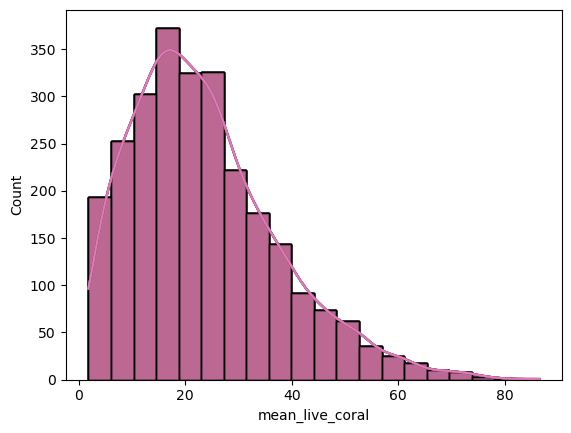

In [230]:
# Check for extreme values

sns.histplot(df['mean_live_coral'], bins=20, kde = True) # shows extreme values for 'mean_live_coral'
plt.show()

In [231]:
#  Everything appears to be good here, no extreme values to be removed

## Making the Choropleth map 

### Make a Choropleth map then diagnosing problems with it



In [207]:
df[df['report_year']==2023]

Unnamed: 0 sector shelf            reef_name reef_id   latitude  \
17            17     CA     I     LOW ISLANDS REEF  16028S -16.383333   
39            39     CA     I    GREEN ISLAND REEF  16049S -16.758333   
56            56     CA     I  FITZROY ISLAND REEF  16054S -16.925000   
132          132     CA     M          MACKAY REEF  16015S -16.050000   
224          224     CA     M        HASTINGS REEF  16057S -16.516667   
...          ...    ...   ...                  ...     ...        ...   
2554        2554     WH     M               19138S  19138S -19.808333   
2582        2582     WH     M               20104S  20104S -20.033333   
2603        2603     WH     O           SLATE REEF  19159S -19.666667   
2625        2625     WH     O            HYDE REEF  19207S -19.758333   
2645        2645     WH     O            REBE REEF  19209S -19.808333   

       longitude p_code  visit_no  year_code  report_year sample_date  \
17    145.566667     RM        31     202223         2023  2023-03-01   
39    145.980000     RM        31     202223         2023  2023-03-03   
56    145.983333     RM        31     202223         2023  2023-03-05   
132   145.650000     RM        31     202223         2023  2022-11-03   
224   146.016667     RM        31     202223         2023  2023-03-02   
...          ...    ...       ...        ...          ...         ...   
2554  149.425000     RM        31     202223         2023  2023-01-29   
2582  149.683333     RM        31     202223         2023  2023-01-28   
2603  149.925000     RM        31     202223         2023  2023-01-31   
2625  150.091667     RM        31     202223         2023  2023-02-02   
2645  150.150000     RM        31     202223         2023  2023-02-01   

     median_live_coral median_soft_coral median_dead_coral  mean_live_coral  \
17                  3L                2L                1L           39.234   
39                  2L                2L                 0           18.698   
56                  3L                2U                 0           30.833   
132                 3L                1U                1L           32.031   
224                 2U                2L                 0           24.631   
...                ...               ...               ...              ...   
2554                2L                1L                1L           19.643   
2582                2L                1L                1L           15.000   
2603                4U                1L                1L           61.480   
2625                4L                1U                1L           53.075   
2645                4L                1U                1L           59.291   

      mean_soft_coral  mean_dead_coral  total_cots  mean_cots_per_tow  \
17             13.306            3.306           0                0.0   
39             17.422            1.198           0                0.0   
56             21.346            1.218           0                0.0   
132            11.146            2.292           0                0.0   
224            19.057            0.861           0                0.0   
...               ...              ...         ...                ...   
2554            3.839            1.518           0                0.0   
2582            2.768            1.786           0                0.0   
2603            2.566            2.434           0                0.0   
2625            9.050            1.550           0                0.0   
2645           16.182            2.838           0                0.0   

      total_trout  mean_trout_per_tow  tows  median_soft_coral_midpoint  \
17            4.0            0.129032    31                        15.0   
39            9.0            0.187500    48                        15.0   
56            NaN                 NaN    39                        25.0   
132           NaN                 NaN    24                         7.5   
224          23.0            0.377049    61        

In [209]:
# Filter data for 'report_year' ==2023

df_2023 = df[df['report_year'] == 2023]

In [215]:
# Merge with the gdf_subset containing the polygons using 
# df_2023['reef_id_formatted_edit'] and gdf_subset['X_LABEL'] as the common columns

gdf_merged = df_2023.merge(
    gdf_subset,
    how='inner',
    left_on='reef_id_formatted_edit',
    right_on='X_LABEL'
)


In [217]:
gdf_merged.head(5)

Unnamed: 0 sector shelf            reef_name reef_id   latitude  \
0          17     CA     I     LOW ISLANDS REEF  16028S -16.383333   
1          39     CA     I    GREEN ISLAND REEF  16049S -16.758333   
2          39     CA     I    GREEN ISLAND REEF  16049S -16.758333   
3          56     CA     I  FITZROY ISLAND REEF  16054S -16.925000   
4          56     CA     I  FITZROY ISLAND REEF  16054S -16.925000   

    longitude p_code  visit_no  year_code  report_year sample_date  \
0  145.566667     RM        31     202223         2023  2023-03-01   
1  145.980000     RM        31     202223         2023  2023-03-03   
2  145.980000     RM        31     202223         2023  2023-03-03   
3  145.983333     RM        31     202223         2023  2023-03-05   
4  145.983333     RM        31     202223         2023  2023-03-05   

  median_live_coral median_soft_coral median_dead_coral  mean_live_coral  \
0                3L                2L                1L           39.234   
1                2L                2L                 0           18.698   
2                2L                2L                 0           18.698   
3                3L                2U                 0           30.833   
4                3L                2U                 0           30.833   

   mean_soft_coral  mean_dead_coral  total_cots  mean_cots_per_tow  \
0           13.306            3.306           0                0.0   
1           17.422            1.198           0                0.0   
2           17.422            1.198           0                0.0   
3           21.346            1.218           0                0.0   
4           21.346            1.218           0                0.0   

   total_trout  mean_trout_per_tow  tows  median_soft_coral_midpoint  \
0          4.0            0.129032    31                        15.0   
1          9.0            0.187500    48                        15.0   
2          9.0            0.187500    48                        15.0   
3          NaN                 NaN    39                        25.0   
4          NaN                 NaN    39                        25.0   

   median_live_coral_midpoint  median_dead_coral_midpoint  \
0                        35.0                         2.5   
1                        15.0                         0.0   
2                        15.0                         0.0   
3                        35.0                         0.0   
4                        35.0                         0.0   

      live_coral_category reef_id_formatted reef_id_formatted_edit  \
0    High coral abundance           16-028S                16-028S   
1  Medium coral abundance           16-049S                16-049S   
2  Medium coral abundance           16-049S                16-049S   
3    High coral abundance           16-054S                16-054S   
4    High coral abundance           16-054S                16-054S   

   TARGET_FID       DATASET                            LOC_NAME_S  \
0        5146  GBR Features             Low Islands Reef (16-028)   
1        5360  GBR Features                 Green Island (16-049)   
2        5930  GBR Features            Green Island Reef (16-049)   
3        5346  GBR Features              Fitzroy Island (16-054a)   
4        5347  GBR Features  Fitzroy Island Reef (No 1) (16-054a)   

                     GBR_NAME CHART_NAME TRAD_NAME UN_FEATURE LABEL_ID  \
0            Low Islands Reef       None      None      FALSE   16-028   
1                Green Island       None      None      FALSE   16-049   
2           Green Island Reef       None      None      FALSE   16-049   
3              Fitzroy Island       None      None      FALSE  16-054a   
4  Fitzroy Island Reef (No 1)       None      None      FALSE  16-054a   

   SORT_GBR_I FEAT_NAME LEVEL_1 LEVEL_2 LEVEL_3 CLASS_CONF CLASS_SRC  \
0       16028      Reef    Reef    None    None       None      None   
1       16049    Island  Island    None    None       None

In [232]:
# Create the choropleth map

m = folium.Map(location=[-18.5, 147.0], zoom_start=5, tiles='cartodbpositron')

folium.Choropleth(
    geo_data=gdf_merged.to_json(),
    data=gdf_merged,
    columns=['reef_id_formatted_edit', 'mean_live_coral'],
    key_on='feature.properties.reef_id_formatted_edit',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Mean Live Coral Cover (%)',
).add_to(m)

m


OverflowError: Maximum recursion level reached

In [234]:
# Going to try to trim things a bit before making the choropleth because there are many unneccessary columns

In [236]:
# Keep only the columns that are needed

gdf_choro = gdf_merged[['reef_name', 'reef_id_formatted_edit', 'mean_live_coral', 'geometry']].copy()

gdf_choro.head(20)

reef_name reef_id_formatted_edit  mean_live_coral  \
0         LOW ISLANDS REEF                16-028S           39.234   
1        GREEN ISLAND REEF                16-049S           18.698   
2        GREEN ISLAND REEF                16-049S           18.698   
3      FITZROY ISLAND REEF                16-054S           30.833   
4      FITZROY ISLAND REEF                16-054S           30.833   
5      FITZROY ISLAND REEF                16-054S           30.833   
6              MACKAY REEF                16-015S           32.031   
7              MACKAY REEF                16-015S           32.031   
8            HASTINGS REEF                16-057S           24.631   
9          MICHAELMAS REEF                16-060S           13.839   
10         MICHAELMAS REEF                16-060S           13.839   
11           THETFORD REEF                16-068S           26.220   
12           ANDERSEN REEF                15-090S           39.507   
13  AGINCOURT REEFS (NO 1)                15-099C           45.313   
14         ST CRISPIN REEF                16-019S           14.942   
15         BROOMFIELD REEF                23-048S           57.823   
16         BROOMFIELD REEF                23-048S           57.823   
17       WRECK ISLAND REEF                23-051S           55.610   
18       WRECK ISLAND REEF                23-051S           55.610   
19           ONE TREE REEF                23-055S           61.507   

                                             geometry  
0   POLYGON ((145.57101 -16.3805, 145.57109 -16.38...  
1   POLYGON ((145.97524 -16.7587, 145.97529 -16.75...  
2   POLYGON ((145.9943 -16.74524, 145.99479 -16.74...  
3   POLYGON ((146.00001 -16.92234, 146.00003 -16.9...  
4   POLYGON ((146 -16.92188, 146.00005 -16.92192, ...  
5   POLYGON ((145.98653 -16.93208, 145.98658 -16.9...  
6   POLYGON ((145.64582 -16.04725, 145.64371 -16.0...  
7   POLYGON ((145.65916 -16.04525, 145.65904 -16.0...  
8   POLYGON ((146.01667 -16.49535, 146.01679 -16.4...  
9   POLYGON ((146.04792 -16.54686, 146.04906 -16.5...  
10  POLYGON ((145.97665 -16.60532, 145.97669 -16.6...  
11  POLYGON ((146.18686 -16.8194, 146.18571 -16.81...  
12  POLYGON ((145.81111 -15.77552, 145.8137 -15.77...  
13  POLYGON ((145.87107 -16.04463, 145.87108 -16.0...  
14  POLYGON ((145.86941 -16.09054, 145.86946 -16.0...  
15  POLYGON ((151.95017 -23.2554, 151.95407 -23.26...  
16  POLYGON ((151.93535 -23.26484, 151.93411 -23.2...  
17  POLYGON ((151.95792 -23.33406, 151.95568 -23.3...  
18  POLYGON ((151.97649 -23.31541, 151.97658 -23.3...  
19  POLYGON ((152.09026 -23.5073, 152.09036 -23.50...

In [240]:
#  Apparently the problem can be caused by invalid geometries

In [244]:
#  Ensure that gdf_choro is a Geodataframe

gdf_choro = gpd.GeoDataFrame(
    gdf_choro,
    geometry='geometry',
    crs="EPSG:4326")

In [245]:
# Check for valid geometries

gdf_choro.is_valid.value_counts()

True     149
False      2
Name: count, dtype: int64

In [246]:
# Repair broken geometries

gdf_choro['geometry'] = gdf_choro['geometry'].buffer(0)

In [247]:
# Check again

gdf_choro.is_valid.value_counts()

True    151
Name: count, dtype: int64

In [284]:
# Reattempt Choroplath

m = folium.Map(location=[-18.5, 147.0], zoom_start=5, tiles='cartodbpositron')

folium.Choropleth(
    geo_data=gdf_choro.to_json(),
    data=gdf_choro,
    columns=['reef_id_formatted_edit', 'mean_live_coral'],
    key_on='feature.properties.reef_name',
    fill_color='viridis',
    fill_opacity=0.1,
    line_opacity=0,
    legend_name='Mean Live Coral Cover (%)',
).add_to(m)

m

In [254]:
# Checks to see why the choropleth isn't showing

# Looking for invalid geometries
print(len(gdf_choro))
print(gdf_choro.geometry.is_empty.sum(), "empty geometries")
print(gdf_choro.geometry.notnull().sum(), "non-null geometries")

151
0 empty geometries
151 non-null geometries


In [256]:
#  No empty geometries

In [258]:
# Check coordinate reference system.  Should be EPSG:4326

gdf_choro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

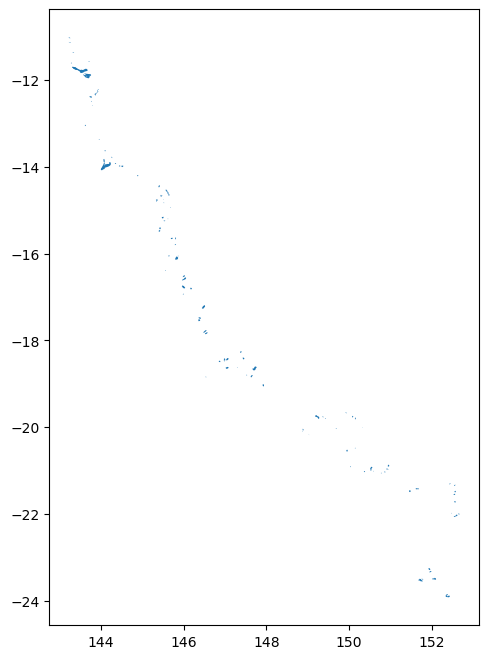

In [261]:
# Visually confirm that geometries exists using pandas

gdf_choro.plot(figsize=(8,8))
plt.show()

In [280]:
# So the problem is that the colours are somehow not allowing the regions to show up.

### Choropleth map (that actually works) 

In [319]:
# Reattempt using different colours for the map

from folium.features import GeoJsonTooltip

m_2 = folium.Map(location=[-18.5, 147], zoom_start=5, tiles='cartodbdark_matter')

folium.Choropleth(
    geo_data=gdf_choro.to_json(),
    data=gdf_choro,
    columns=['reef_id_formatted_edit', 'mean_live_coral'],
    key_on='feature.properties.reef_id_formatted_edit',
    fill_color='YlOrRd',   
    fill_opacity=0.8,
    line_opacity=0,
    line_weight=0,
    nan_fill_color='gray',
    legend_name='Mean Live Coral Cover (%)'
).add_to(m_2)

# Add tooltips to display reef name when cursor hovers over reef

folium.GeoJson(
    gdf_choro.to_json(),
    name="Reef Boundaries",
    style_function=lambda x: {
        'color': 'transparent',     
        'weight': 0,
        'fillOpacity': 0,           
    },
    highlight_function=lambda x: {
        'color': 'white',           
        'weight': 1.2,
        'fillOpacity': 0.5,
    },
    tooltip=GeoJsonTooltip(
        fields=['reef_name', 'mean_live_coral'],
        aliases=['Reef Name:', 'Mean Live Coral (%)'],
        localize=True,
        sticky=True,
        labels=True,
        style=(
            "background-color: #F0EFEF;"
            "border: 1px solid gray;"
            "border-radius: 3px;"
            "box-shadow: 3px 3px 3px rgba(0,0,0,0.3);"
            "padding: 4px;"
        ),
    )
).add_to(m_2)


m_2.save(os.path.join(path,'04 Analysis', 'Visualisations', '6.3', 'GBR_choropleth_dark.html'))
m_2


Questions that this part of the analysis answers:

1.  How does live hard coral and soft coral cover vary across reefs and over time?

    d.  To what extent does coral coverage vary throughout the Great Barrier Reef?

The choropleth shows that live coral cover across the Great Barrier Reef varies considerably.  The map shows that based on surveys published in 2023 there are reefs where the coral is abundant and those where it is sparse.  The reefs with the highest percentage of live coral cover appear to lie at the extreme ends of the GBR as well as those further out from the coast line.  Perhaps decreased ease of access plays a role in why these reefs contain higher abundances of coral.   

Many of the reefs with the lowest abundance of live coral lie in the vicinity of the towns of Cairns and Townsville.
